In [45]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression

import scipy.stats as stats
from scipy import stats
from scipy.stats import kruskal
from scipy import stats

#import pycorrcat.pycorrcat as corrcat  #Calcula la V de cramer para variables categóricas.

import statsmodels.api as sm

import seaborn as sns
# os.chdir('C:/Users/santiago/Documents/Proyecto AI Veeduría')
os.chdir('C:/Users/juanc/OneDrive/Escritorio/LOCAL_Personal_Veeduria')


## Descripción breve de los datos

In [8]:
df = pd.read_csv("SECOP_I_MASTER.csv")

In [9]:
df.head()

,UID,Orden Entidad,Nombre de la Entidad,Código de la Entidad,Tipo de Proceso,Estado del Proceso,Causal de Otras Formas de Contratacion Directa,Regimen de Contratacion,Objeto a Contratar,Tipo de Contrato,...,Tiempo Adiciones (Dias),Fecha Fin Ejec Contrato,Cuantia Proceso,Cuantia Contrato,Valor Total de Adiciones,Valor Contrato con Adiciones,Nombre Sub Unidad Ejecutora,Moneda,Marc Sancion,Valor Promedio de la Sancion
0,18-4-8746134-7949823,DISTRITO CAPITAL,BOGOTÁ D.C. - IED. UNION COLOMBIA,1002363,Régimen Especial,Celebrado,Ninguna,Régimen Especial,"Terrenos, Edificios, Estructuras y Vías",Obra,...,0,2018-10-05,5100000.0,4990600.0,0.0,4990600.0,No definida,Pesos (COP),0,NaN
1,19-4-9658481-8789872,DISTRITO CAPITAL,BOGOTÁ D.C. - CANAL CAPITAL,1002021,Régimen Especial,Celebrado,Ninguna,Régimen Especial,Servicios Públicos y Servicios Relacionados co...,Prestación de Servicios,...,0,2020-02-04,2518660.0,2518660.0,0.0,2518660.0,No definida,Pesos (COP),0,NaN
2,11-12-701288-684900,NACIONAL DESCENTRALIZADO,BOGOTÁ D.C. - SECRETARÍA DISTRITAL DE MOVILIDAD,1002491,Contratación Directa (Ley 1150 de 2007),Celebrado,Prestación de Servicios Profesionales y de Apo...,Estatuto General de Contratación,"Servicios de Gestion, Servicios Profesionales ...",Prestación de Servicios,...,0,2012-02-14,62400000.0,62400000.0,0.0,62400000.0,No definida,Pesos (COP),0,NaN
3,13-4-1531321-1438141,TERRITORIAL DEPARTAMENTAL DESCENTRALIZADO,BOGOTÁ D.C. - E.S.E. HOSPITAL SANTA CLARA III ...,211001040,Régimen Especial,Celebrado,Ninguna,Régimen Especial,Servicios de Salud,Prestación de Servicios,...,0,2012-12-31,1060200.0,1060200.0,0.0,1060200.0,No definida,Pesos (COP),0,NaN
4,16-12-5760717-5243691,DISTRITO CAPITAL,BOGOTÁ D.C. - SECRETARÍA DE EDUCACIÓN,1002001,Contratación Directa (Ley 1150 de 2007),Celebrado,Prestación de Servicios Profesionales y de Apo...,Estatuto General de Contratación,Servicios Personales y Domésticos,Prestación de Servicios,...,0,2016-10-31,2317005.0,2317005.0,0.0,2317005.0,No definida,Pesos (COP),0,NaN


In [10]:
print("Dimensiones del dataset secop I inicial: ",df.shape)

Dimensiones del dataset secop I inicial:  (603628, 41)


In [46]:
df['Valor Promedio de la Sancion'].fillna(0,inplace = True) 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603628 entries, 0 to 603627
Data columns (total 41 columns):
UID                                               603628 non-null object
Orden Entidad                                     603628 non-null object
Nombre de la Entidad                              603628 non-null object
Código de la Entidad                              603628 non-null int64
Tipo de Proceso                                   603628 non-null object
Estado del Proceso                                603628 non-null object
Causal de Otras Formas de Contratacion Directa    603628 non-null object
Regimen de Contratacion                           603628 non-null object
Objeto a Contratar                                603628 non-null object
Tipo de Contrato                                  603628 non-null object
Nombre Grupo                                      603628 non-null object
Nombre Familia                                    603628 non-null object
Nombre Clase  

### Orden Entidad

In [7]:
orden = pd.DataFrame(df["Orden Entidad"].value_counts())/len(df)
print("Porcentaje de entidades por Orden:")
print(orden)

Porcentaje de entidades por Orden:
                                           Orden Entidad
DISTRITO CAPITAL                                0.583308
TERRITORIAL DEPARTAMENTAL DESCENTRALIZADO       0.213557
NACIONAL DESCENTRALIZADO                        0.102681
TERRITORIAL DEPARTAMENTAL CENTRALIZADO          0.100221
NACIONAL CENTRALIZADO                           0.000234


Text(0.5, 1.0, 'Porcentaje de distribucion de entidades por Orden')

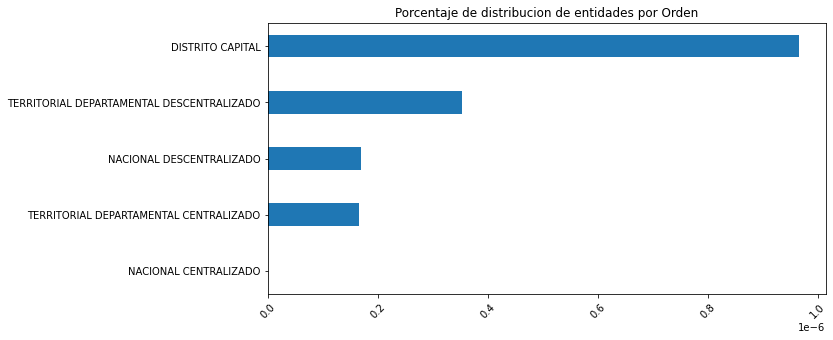

In [8]:
fig = plt.figure(figsize=(10,5));
pos = [2*i for i in range(1,6)]
plt.barh(pos,np.flip(orden["Orden Entidad"])/len(df),
         tick_label=np.flip(orden.index));
plt.xticks(rotation=45);
plt.title("Porcentaje de distribucion de entidades por Orden")

### Tipo de Proceso

In [9]:
print("Porcentaje de datos por Tipo de proceso:")
df["Tipo de Proceso"].value_counts()/len(df)

Porcentaje de datos por Tipo de proceso:


Contratación Directa (Ley 1150 de 2007)                                                  0.569516
Régimen Especial                                                                         0.391798
Contratación Mínima Cuantía                                                              0.018130
Selección Abreviada de Menor Cuantía (Ley 1150 de 2007)                                  0.005871
Subasta                                                                                  0.005507
Licitación Pública                                                                       0.004968
Concurso de Méritos Abierto                                                              0.003096
Contratos y convenios con más de dos partes                                              0.000870
Licitación obra pública                                                                  0.000104
Selección Abreviada del literal h del numeral 2 del artículo 2 de la Ley 1150 de 2007    0.000056
Selección Abreviada 

### Estado del proceso

In [10]:
print("Porcentaje de datos por Estado de proceso:")
df["Estado del Proceso"].value_counts()/len(df)

Porcentaje de datos por Estado de proceso:


Celebrado                 0.797708
Liquidado                 0.139564
Terminado sin Liquidar    0.062706
Convocado                 0.000020
Adjudicado                0.000002
Name: Estado del Proceso, dtype: float64

### Causal de Otras Formas de Contratacion Directa

In [18]:
print("Porcentaje de datos Causal de Otras Formas de Contratacion Directa:")
df["Causal de Otras Formas de Contratacion Directa"].value_counts()/len(df)

Porcentaje de datos Causal de Otras Formas de Contratacion Directa:


Prestación de Servicios Profesionales y de Apoyo a la Gestión (Literal H)             0.536378
Ninguna                                                                               0.430515
Arrendamiento o Adquisición de Inmuebles (Literal I)                                  0.017014
Contratos Interadministrativos (Literal C)                                            0.008886
Cuando no Exista Pluralidad de Oferentes en el Mercado (Literal G)                    0.005260
Contratos de Encargo Fiduciario que Celebren Entidades Territoriales (Literal F)      0.000666
Contratos para el Desarrollo de Actividades Científicas y Tecnológicas (Literal E)    0.000661
Contratación de Bienes y Servicios en el Sector Defensa y en el DAS (Literal D)       0.000292
Urgencia Manifiesta (Literal A)                                                       0.000258
Contratación de Empréstitos (Literal B)                                               0.000070
Name: Causal de Otras Formas de Contratacion Direc

### Régimen de Contratación

In [19]:
print("Porcentaje de datos Régimen de Contratación:")
df["Regimen de Contratacion"].value_counts()/len(df)

Porcentaje de datos Régimen de Contratación:


Estatuto General de Contratación    0.606251
Régimen Especial                    0.393469
Ley 80 de 1993                      0.000280
Name: Regimen de Contratacion, dtype: float64

### Objeto a Contratar

In [20]:
print("Porcentaje de datos Objeto a Contratar:")
df["Objeto a Contratar"].value_counts()/len(df)

Porcentaje de datos Objeto a Contratar:


Servicios de Gestion, Servicios Profesionales de Empresa y Servicios Administrativos                          0.480664
Servicios de Salud                                                                                            0.146597
Servicios Educativos y de Formación                                                                           0.060903
Servicios Públicos y Servicios Relacionados con el Sector Público                                             0.043591
Servicios de Edificación, Construcción de Instalaciones y Mantenimiento                                       0.036687
Servicios Personales y Domésticos                                                                             0.029038
Servicios Basados en Ingeniería, Investigación y Tecnología                                                   0.016419
Terrenos, Edificios, Estructuras y Vías                                                                       0.016207
Equipos de Oficina, Accesorios y Suministros    

### Nombre grupo

In [21]:
print("Porcentaje de datos Nombre Grupo:")
df["Nombre Grupo"].value_counts()/len(df)

Porcentaje de datos Nombre Grupo:


[F] Servicios                                                  0.885106
[E] Productos de Uso Final                                     0.077071
[G] Terrenos, Edificios, Estructuras y vías                    0.016207
[D] Componentes y Suministros                                  0.012039
[B] Materias Primas                                            0.004751
[C] Maquinaria, Herramientas, Equipo Industrial y Vehículos    0.003729
[A] Material Vivo Animal y Vegetal                             0.001097
Name: Nombre Grupo, dtype: float64

### Nombre Familia

In [132]:
print("Porcentaje de datos Nombre Familia:")
df["Nombre Familia"].value_counts(normalize = True).head(50)#/len(df)

Porcentaje de datos Nombre Familia:


No Definido                                                                       0.417550
Servicios de recursos humanos                                                     0.172311
Servicios integrales de salud                                                     0.103257
Servicios de asesoría de gestión                                                  0.033878
Servicios de mantenimiento y reparaciones de construcciones e instalaciones       0.028347
Servicios de administración de empresas                                           0.021987
Formación profesional                                                             0.019471
Estructuras y edificios permanentes                                               0.013702
Materiales didácticos profesionales y de desarrollo y accesorios y suministros    0.009633
Servicios de medios de telecomunicaciones                                         0.009092
Servicios informáticos                                                            0.007218

### Nombre Clase

In [30]:
print("Porcentaje de datos Nombre Clase:")
df["Nombre Clase"].value_counts(normalize = True).head(10)#/len(df)

Porcentaje de datos Nombre Clase:


No Definido                                                          0.417550
Servicios de personal temporal                                       0.138179
Personas de soporte de prestación de servicios de salud              0.072273
Desarrollo de recursos humanos                                       0.030520
Servicios de consultoría de negocios y administración corporativa    0.027066
Servicios de mantenimiento y reparación de instalaciones             0.022413
Servicios de apoyo gerencial                                         0.021460
Servicios de capacitación vocacional no - científica                 0.018887
Servicios de administración de salud                                 0.016613
Centros de salud                                                     0.014371
Name: Nombre Clase, dtype: float64

### Tipo de Contrato

In [11]:
print("Porcentaje de datos por Tipo de contrato:")
df["Tipo de Contrato"].value_counts()/len(df)

Porcentaje de datos por Tipo de contrato:


Prestación de Servicios    0.835090
Suministro                 0.062187
Otro Tipo de Contrato      0.035896
Compraventa                0.026477
Obra                       0.021878
Arrendamiento              0.009385
Interventoría              0.003320
Consultoría                0.002632
Comodato                   0.002566
Acuerdo Marco              0.000262
Concesión                  0.000103
Fiducia                    0.000093
Crédito                    0.000080
No definido                0.000017
Agregación de Demanda      0.000015
Name: Tipo de Contrato, dtype: float64

### EsPostConflicto

In [31]:
print("Porcentaje de datos por EsPostConflicto:")
df["EsPostConflicto"].value_counts()/len(df)

Porcentaje de datos por EsPostConflicto:


No Definido    0.997366
Si             0.002634
Name: EsPostConflicto, dtype: float64

### Definición del Origen de los Recursos

In [32]:
print("Porcentaje de datos por Def Origen Recur:")
df["Def Origen Recur"].value_counts()/len(df)

Porcentaje de datos por Def Origen Recur:


0    0.807719
1    0.192281
Name: Def Origen Recur, dtype: float64

### Número Origenes de los recursos

In [34]:
print("Porcentaje de datos por Num Origenes Recur:")
df["Num Origenes Recur"].value_counts()/len(df)

Porcentaje de datos por Num Origenes Recur:


No aplica    0.807719
1            0.191709
2            0.000519
10           0.000025
9            0.000012
3            0.000012
7            0.000003
4            0.000002
Name: Num Origenes Recur, dtype: float64

### Tipo de Identificación del Contratista

In [36]:
print("Porcentaje de datos por Tipo Identifi del Contratista:")
df["Tipo Identifi del Contratista"].value_counts()/len(df)

Porcentaje de datos por Tipo Identifi del Contratista:


Cédula de Ciudadanía       0.776334
Nit de Persona Jurídica    0.172583
Nit de Persona Natural     0.047798
Cédula de Extranjería      0.001194
Nit de Extranjería         0.000895
Pasaporte                  0.000538
Carné Diplomático          0.000391
Sociedades Extranjeras     0.000212
Número de Fideicomiso      0.000027
Tarjeta de Identidad       0.000020
Nuip                       0.000008
Name: Tipo Identifi del Contratista, dtype: float64

### Departamento y Minicipio del Contratista

In [39]:
print("Porcentaje de datos por  Dpto y Muni Contratista:")
df["Dpto y Muni Contratista"].value_counts(normalize = True).head(20)

Porcentaje de datos por  Dpto y Muni Contratista:


Bogotá D.C.        0.872055
Cundinamarca       0.117309
Atlántico          0.001451
No Definido        0.001304
Antioquia          0.001125
Bolívar            0.000967
Caquetá            0.000946
Valle del Cauca    0.000704
Guaviare           0.000479
Amazonas           0.000439
Boyacá             0.000424
Santander          0.000300
Caldas             0.000272
Colombia           0.000252
Meta               0.000227
Risaralda          0.000184
Vaupés             0.000169
Tolima             0.000136
Córdoba            0.000116
Huila              0.000104
Name: Dpto y Muni Contratista, dtype: float64

### Mes Firma del Contrato

In [40]:
print("Porcentaje de datos por Mes Firma Contrato:")
df["Mes Firma Contrato"].value_counts(normalize = True)

Porcentaje de datos por Mes Firma Contrato:


Enero         0.178491
Febrero       0.102904
Marzo         0.096392
Septiembre    0.079226
Mayo          0.075494
Abril         0.072185
Diciembre     0.071902
Noviembre     0.069945
Agosto        0.065893
Julio         0.064730
Octubre       0.063599
Junio         0.059238
Name: Mes Firma Contrato, dtype: float64

### Día Mes Firma del Contrato

In [41]:
print("Porcentaje de datos por Día Mes Firma Contrato:")
df["Dia del Mes Firma Contrato"].value_counts(normalize = True)

Porcentaje de datos por Día Mes Firma Contrato:


1     0.129669
2     0.053748
24    0.036854
3     0.035109
26    0.034957
18    0.033254
4     0.032498
22    0.032452
17    0.031377
23    0.030885
10    0.030202
16    0.029941
27    0.029092
11    0.028143
30    0.027540
5     0.027368
25    0.027078
21    0.026894
20    0.026778
19    0.026614
15    0.026182
29    0.025941
31    0.025870
28    0.025441
8     0.025186
9     0.025140
6     0.024475
13    0.023142
12    0.023008
7     0.022991
14    0.022169
Name: Dia del Mes Firma Contrato, dtype: float64

### Día de la Semana Firma del Contrato

In [42]:
print("Porcentaje de datos por Día de la Firma Contrato:")
df["Dia de la Semana Firma Contrato"].value_counts(normalize = True)

Porcentaje de datos por Día de la Firma Contrato:


Viernes      0.243547
Martes       0.186953
Lunes        0.179047
Miércoles    0.178370
Jueves       0.173324
Sábado       0.023968
Domingo      0.014791
Name: Dia de la Semana Firma Contrato, dtype: float64

### Plazo en dias de Ejec del Contrato

In [45]:
print("Porcentaje de datos por Plazo en dias de Ejec del Contrato:")
df["Plazo en dias de Ejec del Contrato"].value_counts(normalize = True).head(30)

Porcentaje de datos por Plazo en dias de Ejec del Contrato:


30     0.054843
31     0.039359
334    0.036135
61     0.030867
365    0.028168
92     0.026649
184    0.026324
122    0.024474
90     0.024031
153    0.022834
181    0.022068
243    0.018843
306    0.018013
275    0.017889
60     0.016936
245    0.016605
214    0.016225
1      0.015688
304    0.015384
59     0.014620
91     0.013735
183    0.013594
212    0.012095
15     0.011747
303    0.011307
120    0.010677
10     0.009594
5      0.008994
8      0.008863
123    0.008775
Name: Plazo en dias de Ejec del Contrato, dtype: float64

### Marc Adiciones

In [47]:
print("Porcentaje de datos por Plazo en dias de Marc Adiciones:")
df["Marc Adiciones"].value_counts(normalize = True).head(30)

Porcentaje de datos por Plazo en dias de Marc Adiciones:


0    0.748204
1    0.251796
Name: Marc Adiciones, dtype: float64

### Adicion en Valor

In [49]:
print("Porcentaje de datos por Plazo en Adicion en Valor:")
df["Adicion en Valor"].value_counts(normalize = True)

Porcentaje de datos por Plazo en Adicion en Valor:


0    0.764776
1    0.235224
Name: Adicion en Valor, dtype: float64

### Adicion en Tiempo

In [50]:
print("Porcentaje de datos por Plazo en Adicion en Tiempo:")
df["Adicion en Tiempo"].value_counts(normalize = True)

Porcentaje de datos por Plazo en Adicion en Tiempo:


0    0.762861
1    0.237139
Name: Adicion en Tiempo, dtype: float64

### Tiempo Adiciones (Dias)

In [53]:
print("Porcentaje de datos por Plazo en Tiempo Adiciones (Dias):")
df["Tiempo Adiciones (Dias)"].value_counts(normalize = True).head(20)

Porcentaje de datos por Plazo en Tiempo Adiciones (Dias):


0      0.763619
92     0.016913
31     0.014559
61     0.013414
30     0.009551
91     0.006973
62     0.006367
122    0.006174
60     0.004809
59     0.003510
121    0.003491
90     0.003459
120    0.003325
153    0.003308
10     0.002979
15     0.002546
89     0.002232
45     0.002044
46     0.001971
16     0.001907
Name: Tiempo Adiciones (Dias), dtype: float64

### Nombre Sub Unidad Ejecutora

In [54]:
print("Porcentaje de datos por Nombre Sub Unidad Ejecutora:")
df["Nombre Sub Unidad Ejecutora"].value_counts(normalize = True).head(20)

Porcentaje de datos por Nombre Sub Unidad Ejecutora:


No definida               0.999856
SNR ORIP BOGOTA CENTRO    0.000144
Name: Nombre Sub Unidad Ejecutora, dtype: float64

### Moneda

In [55]:
print("Porcentaje de datos por Moneda:")
df["Moneda"].value_counts(normalize = True)

Porcentaje de datos por Moneda:


Pesos (COP)      0.998776
Dólares (USD)    0.000979
No Definida      0.000245
Name: Moneda, dtype: float64

### Marcación Sanción

In [57]:
print("Porcentaje de datos por Marc Sancion:")
df["Marc Sancion"].value_counts(normalize = True)

Porcentaje de datos por Marc Sancion:


0    0.999684
1    0.000316
Name: Marc Sancion, dtype: float64

### Cuantía Proceso

In [77]:
df['Cuantia Proceso'].describe().to_frame()

,Cuantia Proceso
count,6.036280e+05
mean,5.184009e+08
std,1.294284e+11
min,0.000000e+00
25%,3.708000e+06
50%,1.108800e+07
75%,2.500000e+07
max,7.500001e+13


In [89]:
len(df[df['Cuantia Proceso'] == 0.0])

10659

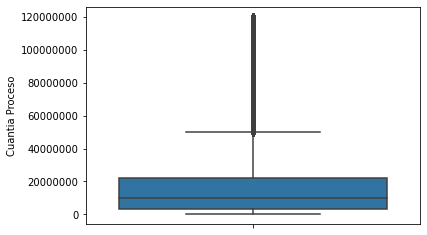

In [95]:
q952 = df['Cuantia Proceso'].quantile(0.95)
valor_procesos = df.loc[df['Cuantia Proceso'] < q952, 'Cuantia Proceso']

bx = sns.boxplot(y=valor_procesos);
bx.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()


Text(0.5, 1.0, 'Distribución de la Cuantía de los Procesos(excluyendo valores superiores al percentil 95)')

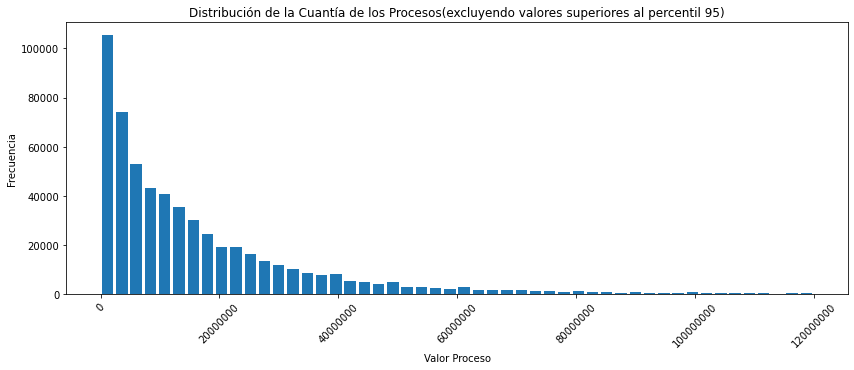

In [90]:
fig, ax = plt.subplots(figsize=(14,5))
ax.hist(valor_procesos, bins=50, rwidth=0.8)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.xlabel('Valor Proceso')
plt.title('Distribución de la Cuantía de los Procesos(excluyendo valores superiores al percentil 95)')

### Cuantía Contrato

In [96]:
df['Cuantia Contrato'].describe().to_frame()

,Cuantia Contrato
count,6.036280e+05
mean,9.349222e+07
std,4.240826e+09
min,0.000000e+00
25%,3.600000e+06
50%,1.080000e+07
75%,2.425911e+07
max,2.640000e+12


In [99]:
len(df[df['Cuantia Contrato'] == 0.0])

10618

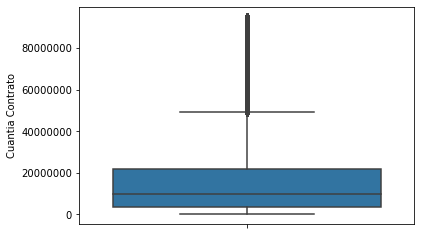

In [100]:
q952 = df['Cuantia Contrato'].quantile(0.95)
valor_contratos = df.loc[df['Cuantia Contrato'] < q952, 'Cuantia Contrato']

bx = sns.boxplot(y=valor_contratos);
bx.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()


Text(0.5, 1.0, 'Distribución de la Cuantía de los Contratos(excluyendo valores superiores al percentil 95)')

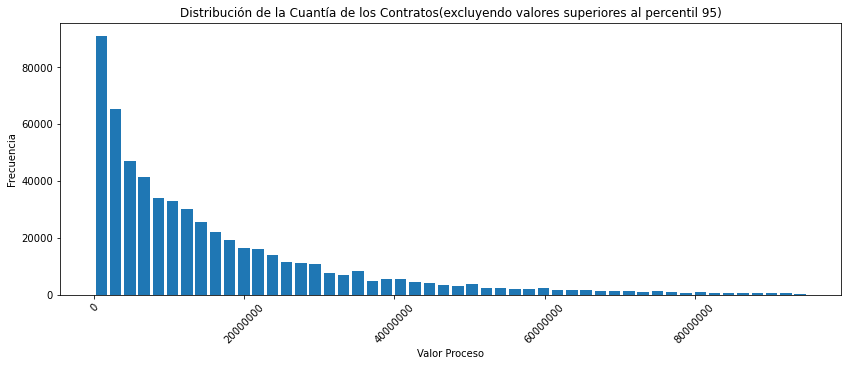

In [102]:
fig, ax = plt.subplots(figsize=(14,5))
ax.hist(valor_contratos, bins=50, rwidth=0.8)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.xlabel('Valor Proceso')
plt.title('Distribución de la Cuantía de los Contratos(excluyendo valores superiores al percentil 95)')

### Valor Total de Adiciones

In [103]:
df['Valor Total de Adiciones'].describe().to_frame()

,Valor Total de Adiciones
count,6.036280e+05
mean,1.721160e+07
std,1.318510e+09
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,8.181533e+11


In [104]:
len(df[df['Valor Total de Adiciones'] == 0.0])

461640

In [109]:
valor_ads['Valor Total de Adiciones'].describe().to_frame()

,Valor Total de Adiciones
count,1.419880e+05
mean,7.317099e+07
std,2.717835e+09
min,3.000000e+00
25%,3.000000e+06
50%,6.000000e+06
75%,1.200000e+07
max,8.181533e+11


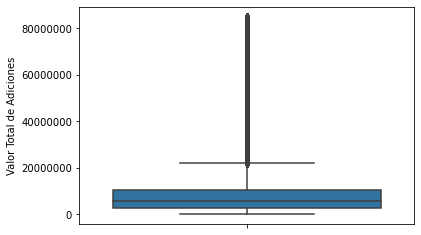

In [110]:
valor_ads = df[df['Valor Total de Adiciones'] != 0.0]
q952 = valor_ads['Valor Total de Adiciones'].quantile(0.95)
ads = valor_ads.loc[valor_ads['Valor Total de Adiciones'] < q952, 'Valor Total de Adiciones']

bx = sns.boxplot(y=ads);
bx.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()


Text(0.5, 1.0, 'Distribución de los valores de adiciones(excluyendo valores superiores al percentil 95)')

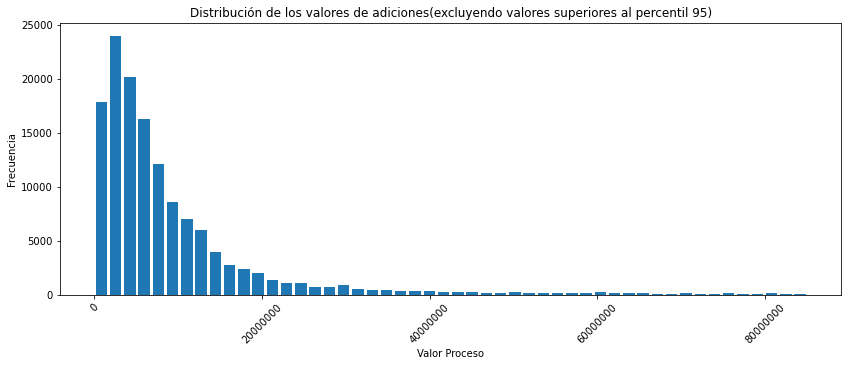

In [112]:
fig, ax = plt.subplots(figsize=(14,5))
ax.hist(ads, bins=50, rwidth=0.8)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.xlabel('Valor Proceso')
plt.title('Distribución de los valores de adiciones(excluyendo valores superiores al percentil 95)')

### Valor Contrato con Adiciones

In [113]:
df['Valor Contrato con Adiciones'].describe().to_frame()

,Valor Contrato con Adiciones
count,6.036280e+05
mean,1.107038e+08
std,4.476482e+09
min,0.000000e+00
25%,4.185000e+06
50%,1.200000e+07
75%,2.730000e+07
max,2.640000e+12


In [114]:
len(df[df['Valor Contrato con Adiciones'] == 0.0])

10452

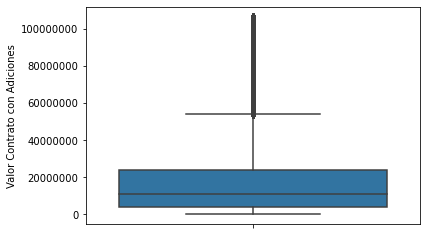

In [115]:
q952 = df['Valor Contrato con Adiciones'].quantile(0.95)
valor_contrato_ads = df.loc[df['Valor Contrato con Adiciones'] < q952, 'Valor Contrato con Adiciones']

bx = sns.boxplot(y=valor_contrato_ads);
bx.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()


Text(0.5, 1.0, 'Distribución de la Cuantía de los Contratos(excluyendo valores superiores al percentil 95)')

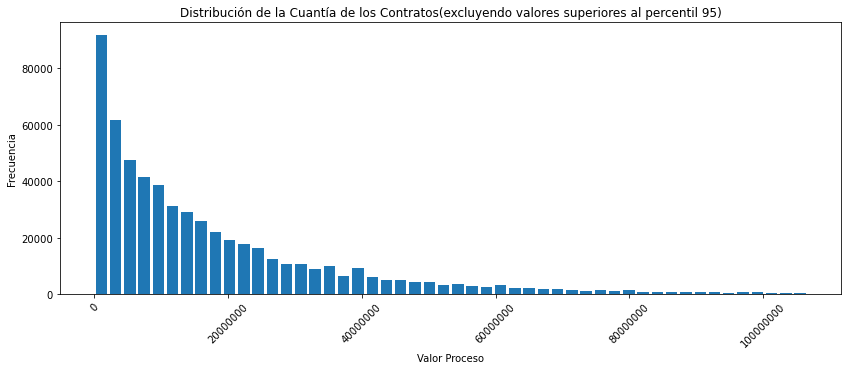

In [116]:
fig, ax = plt.subplots(figsize=(14,5))
ax.hist(valor_contrato_ads, bins=50, rwidth=0.8)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.xlabel('Valor Proceso')
plt.title('Distribución de la Cuantía de los Contratos(excluyendo valores superiores al percentil 95)')

### Valor Promedio de la Sancion

In [123]:
df['Valor Promedio de la Sancion'].isnull().value_counts()

True     603436
False       192
Name: Valor Promedio de la Sancion, dtype: int64

In [117]:
df['Valor Promedio de la Sancion'].describe().to_frame()

,Valor Promedio de la Sancion
count,1.920000e+02
mean,1.171368e+08
std,4.282688e+08
min,0.000000e+00
25%,9.907500e+05
50%,3.376500e+06
75%,3.499001e+07
max,4.195838e+09


In [118]:
len(df[df['Valor Promedio de la Sancion'] == 0.0])

8

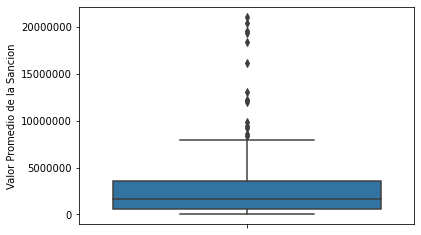

In [130]:
q952 = df['Valor Promedio de la Sancion'].quantile(0.70)
valor_sancion = df.loc[df['Valor Promedio de la Sancion'] < q952, 'Valor Promedio de la Sancion']

bx = sns.boxplot(y=valor_sancion);
bx.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()


Text(0.5, 1.0, 'Distribución de la Cuantía de los Contratos(excluyendo valores superiores al percentil 95)')

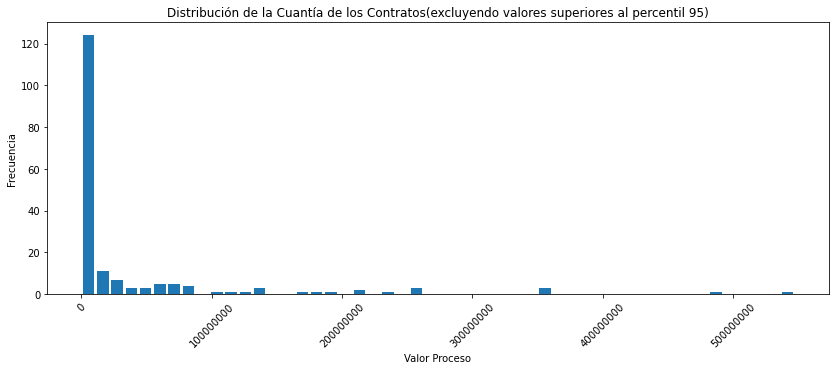

In [126]:
fig, ax = plt.subplots(figsize=(14,5))
ax.hist(valor_sancion, bins=50, rwidth=0.8)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.xlabel('Valor Proceso')
plt.title('Distribución de la Cuantía de los Contratos(excluyendo valores superiores al percentil 95)')

In [127]:
pd.cut(valor_sancion, bins=50).value_counts()

(-547001.49, 10940029.8]      124
(10940029.8, 21880059.6]       11
(21880059.6, 32820089.4]        7
(54700149.0, 65640178.8]        5
(65640178.8, 76580208.6]        5
(76580208.6, 87520238.4]        4
(32820089.4, 43760119.2]        3
(43760119.2, 54700149.0]        3
(251620685.4, 262560715.2]      3
(350080953.6, 361020983.4]      3
(131280357.6, 142220387.4]      3
(207860566.2, 218800596.0]      2
(175040476.8, 185980506.6]      1
(185980506.6, 196920536.4]      1
(98460268.2, 109400298.0]       1
(164100447.0, 175040476.8]      1
(120340327.8, 131280357.6]      1
(109400298.0, 120340327.8]      1
(229740625.8, 240680655.6]      1
(536061460.2, 547001490.0]      1
(481361311.2, 492301341.0]      1
(317260864.2, 328200894.0]      0
(306320834.4, 317260864.2]      0
(514181400.6, 525121430.4]      0
(503241370.8, 514181400.6]      0
(492301341.0, 503241370.8]      0
(470421281.4, 481361311.2]      0
(459481251.6, 470421281.4]      0
(448541221.8, 459481251.6]      0
(87520238.4, 9

----------

## Primer Filtro de Variables

Dada la primera inspección de las variables  que se consideraron,  se decide eliminar 

- Orden Entidad
- Estado del Proceso
- Nombre Familia
- Nombre Clase
- EsPostConflicto
- Nombre Sub Unidad Ejecutora
- Moneda
- Cuantía Proceso
- Valor Contrato con Adiciones

Ya sea por la falta de confiabilidad en la información ó la poca distribución que ellas consignan

Como varaibles de Identificación tenemos:

- UID
- Nombre de la Entidad
- Código de la Entidad
- Descrip Origenes Recur
- Id Adjudicación
- Identificación del Contratista
- Nombre o Razón Social del Contratista
- Fecha Firma del Contrato
- Fecha Incio Ejecución del Contrato
- Fecha Fin de Ejecución del Contrato


Variables que se quedan en el modelo

- Tipo de Proceso                                  
- Causal de Otras Formas de Contratacion Directa   
- Regimen de Contratacion                          
- Objeto a Contratar                               
- Tipo de Contrato                                 
- Nombre Grupo                                     
- Def Origen Recur                                
- Num Origenes Recur                               
- Tipo Identifi del Contratista                    
- Dpto y Muni Contratista                          
- Mes Firma Contrato                               
- Dia del Mes Firma Contrato    
- Dia de la Semana Firma de Contrato
- Plazo en dias de Ejec del Contrato                
- Marc Adiciones                                    
- Adicion en Valor                                  
- Adicion en Tiempo                                
- Tiempo Adiciones (Dias)                          
- Cuantia Contrato                                
- Valor Total de Adiciones                        
- Marc Sancion
- Valor Promedio de la Sanción


#### Definición de las varaibles categóricas

In [12]:
dat_cat = ['Tipo de Proceso', 'Causal de Otras Formas de Contratacion Directa',
       'Regimen de Contratacion', 'Objeto a Contratar', 'Tipo de Contrato', 'Nombre Grupo', 'Def Origen Recur', 
       'Num Origenes Recur', 'Tipo Identifi del Contratista', 'Dpto y Muni Contratista', 'Mes Firma Contrato',
       'Dia del Mes Firma Contrato', 'Dia de la Semana Firma Contrato', 'Marc Adiciones', 'Adicion en Valor', 
       'Adicion en Tiempo',  'Marc Sancion']

#for i in dat_cat:
 #   df[i] = df[i].astype('category')

In [13]:
dat_cuant = ['Cuantia Contrato', 'Valor Total de Adiciones', 'Valor Promedio de la Sancion',
             'Plazo en dias de Ejec del Contrato', 'Tiempo Adiciones (Dias)']

In [48]:
base_secop = df[['Tipo de Proceso', 'Causal de Otras Formas de Contratacion Directa', 'Regimen de Contratacion', 
                 'Objeto a Contratar', 'Tipo de Contrato', 'Nombre Grupo', 'Def Origen Recur', 'Num Origenes Recur',
                 'Tipo Identifi del Contratista', 'Dpto y Muni Contratista', 'Mes Firma Contrato', 'Dia del Mes Firma Contrato',
                 'Dia de la Semana Firma Contrato', 'Marc Adiciones', 'Adicion en Valor', 'Adicion en Tiempo', 'Marc Sancion', 
                 'Cuantia Contrato', 'Valor Total de Adiciones', 'Valor Promedio de la Sancion',
                 'Plazo en dias de Ejec del Contrato', 'Tiempo Adiciones (Dias)']]

### Correlaciones entre variables independientes Cuantitativas

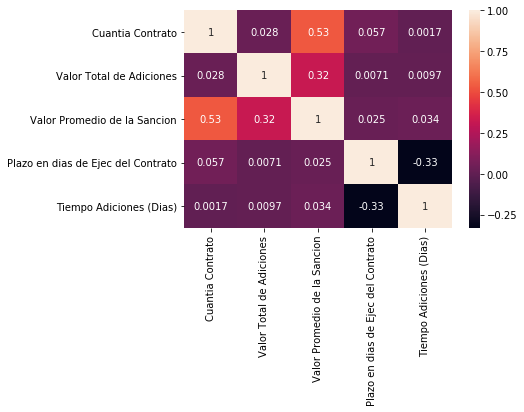

In [15]:

sns.heatmap(base_secop[dat_cuant].corr(), annot=True)
#plt.title('Correlación entre variables explicativas numéricas y objetivo', fontsize=16)
plt.show()

## Correlaciones entre varaibles independientes categóricas usando V de Cramer

In [82]:
bx = corrcat.corr_matrix(df, dat_cat )

<AxesSubplot:>

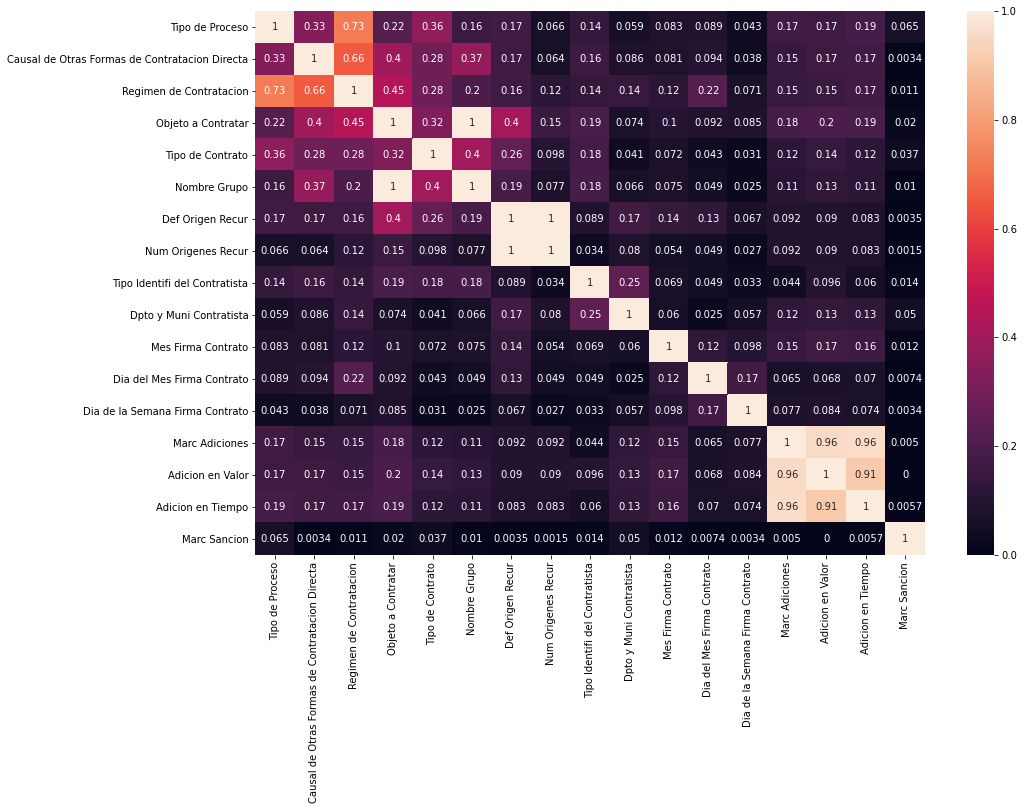

In [68]:
plt.figure(figsize=(15,10))
sns.heatmap(bx, annot=True)

## Correlación entre variables cuantitativas y cualitativas

In [57]:
mat_corr = []
for x,i in enumerate(dat_cat):
    row = []
    for y,j in enumerate(dat_cuant):
        cc = []
        for k in base_secop[i].unique():
            cc.append(list(base_secop[base_secop[i] == k][j]))
        cc = tuple(cc)
        row.append(stats.f_oneway(*cc)[0])
    mat_corr.append(row)

    


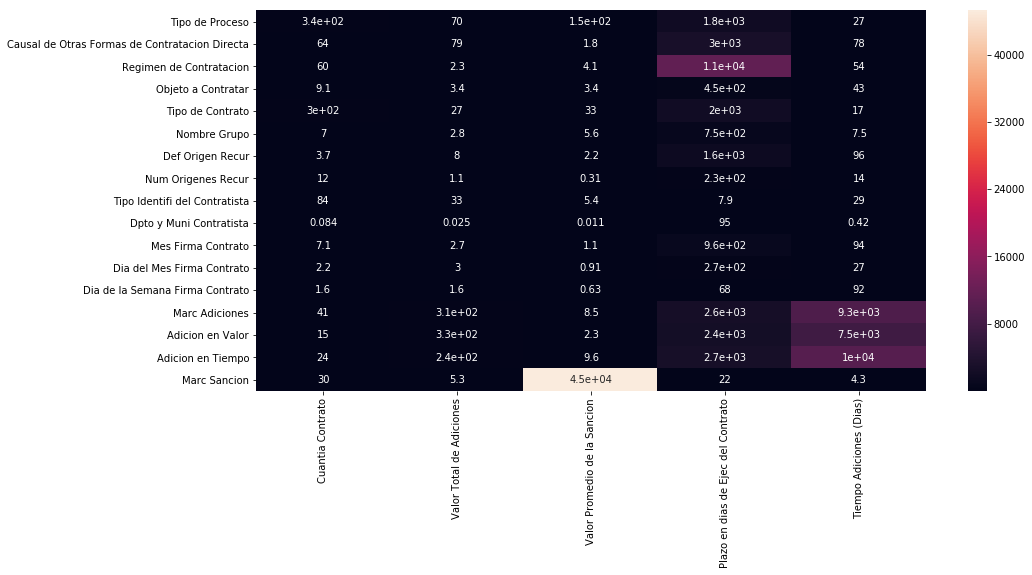

In [77]:
he = pd.DataFrame(mat_corr, columns=dat_cuant)
he.set_index(pd.Series(dat_cat), inplace = True)
plt.figure(figsize=(15,7))
sns.heatmap(he, annot=True)

In [76]:
he

,Cuantia Contrato,Valor Total de Adiciones,Valor Promedio de la Sancion,Plazo en dias de Ejec del Contrato,Tiempo Adiciones (Dias)
0,343.601696,69.883097,145.684964,1842.953574,27.416431
1,63.682641,78.773839,1.808214,2971.361162,78.417962
2,60.291435,2.335576,4.057431,11325.053747,53.712721
3,9.117386,3.418731,3.359390,454.608010,42.692878
4,297.541141,27.146298,32.533285,2011.292064,16.693098
5,7.043009,2.778867,5.622935,754.423724,7.471348
6,3.713959,7.979927,2.180783,1578.836441,95.635313
7,11.900027,1.141494,0.311571,227.742896,13.751850
8,83.525006,32.778697,5.353997,7.874173,29.223893
9,0.084301,0.025213,0.011239,94.625083,0.423222


## Correlaciones entre Variables independientes y Outputs

### Con Coeficiente Pearson (Variables Cuantitativas)

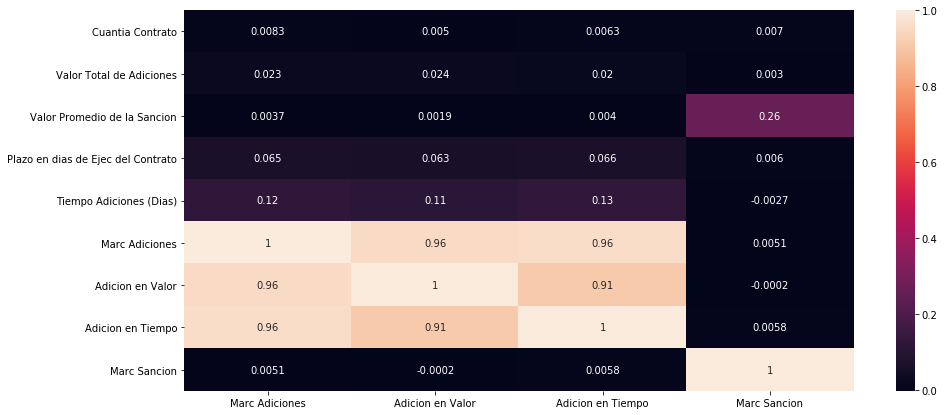

In [80]:
plt.figure(figsize=(15,7))
sns.heatmap(base_secop[dat_cuant+['Marc Adiciones','Adicion en Valor', 'Adicion en Tiempo', 'Marc Sancion']].corr()[['Marc Adiciones','Adicion en Valor', 'Adicion en Tiempo', 'Marc Sancion']], annot=True)
#plt.title('Correlación entre variables explicativas numéricas y objetivo', fontsize=16)
plt.show()

### Con ANOVA (Variables Cuantitativas)

In [84]:
vari = ['Marc Adiciones','Adicion en Valor', 'Adicion en Tiempo', 'Marc Sancion']
mat_corr2 = []
for x,i in enumerate(vari):
    row = []
    for y,j in enumerate(dat_cuant):
        cc = []
        for k in base_secop[i].unique():
            cc.append(list(base_secop[base_secop[i] == k][j]))
        cc = tuple(cc)
        row.append(stats.f_oneway(*cc)[0])
    mat_corr2.append(row)

    


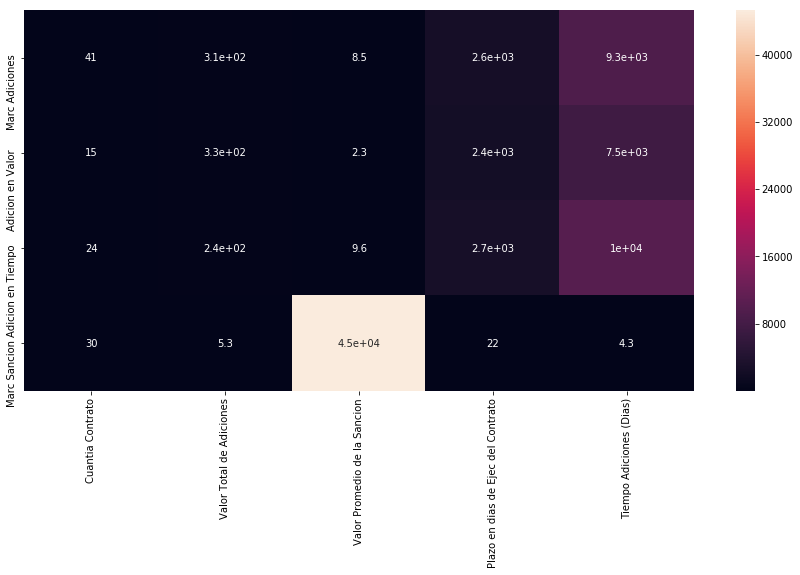

In [85]:
he2 = pd.DataFrame(mat_corr2, columns=dat_cuant)
he2.set_index(pd.Series(vari), inplace = True)
plt.figure(figsize=(15,7))
sns.heatmap(he2, annot=True)

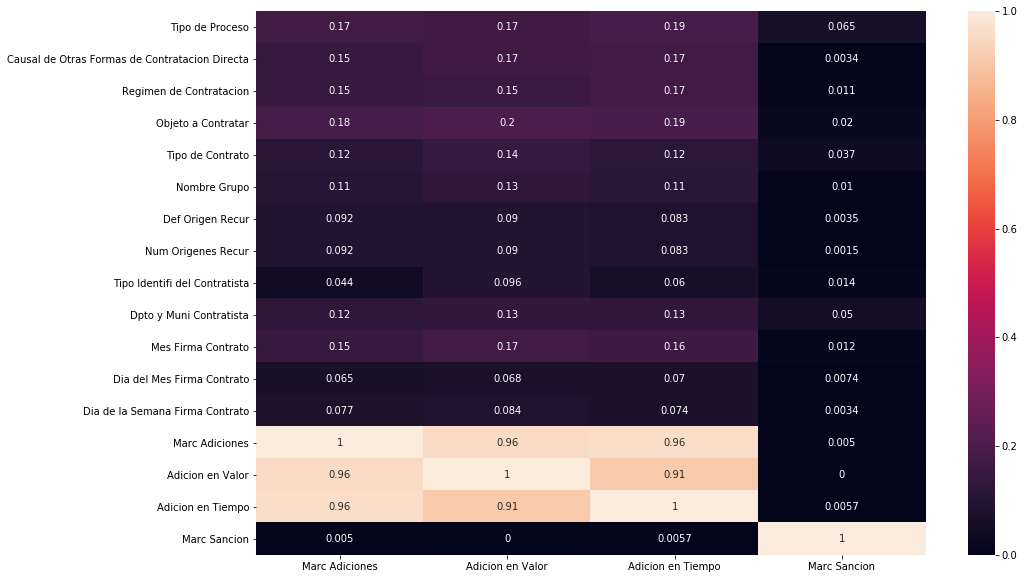

In [83]:
plt.figure(figsize=(15,10))
sns.heatmap(bx[['Marc Adiciones','Adicion en Valor', 'Adicion en Tiempo', 'Marc Sancion']], annot=True)

-----------------------------------------

In [12]:
objetos = pd.DataFrame(df["Objeto a Contratar"].value_counts())

In [13]:
dic_obj = dict()
cods_obj = range(1,len(objetos)+1)
for k in cods_obj:
    dic_obj[k] = objetos.index[k-1]
dic_obj

{1: 'Servicios de Gestion, Servicios Profesionales de Empresa y Servicios Administrativos',
 2: 'Servicios de Salud',
 3: 'Servicios Educativos y de Formación',
 4: 'Servicios Públicos y Servicios Relacionados con el Sector Público',
 5: 'Servicios de Edificación, Construcción de Instalaciones y Mantenimiento',
 6: 'Servicios Personales y Domésticos',
 7: 'Servicios Basados en Ingeniería, Investigación y Tecnología',
 8: 'Terrenos, Edificios, Estructuras y Vías',
 9: 'Equipos de Oficina, Accesorios y Suministros',
 10: 'Instrumentos Musicales, Juegos, Artes, Artesanías y Equipo educativo, Materiales, Accesorios y Suministros',
 11: 'Equipo Médico, Accesorios y Suministros',
 12: 'Servicios Medioambientales',
 13: 'Servicios Editoriales, de Diseño, de Artes Graficas y Bellas Artes',
 14: 'Servicios de Transporte, Almacenaje y Correo',
 15: 'Servicios de Contratacion Agrícola, Pesquera, Forestal y de Fauna',
 16: 'Servicios de Viajes, Alimentación, Alojamiento y Entretenimiento',
 17: 'D

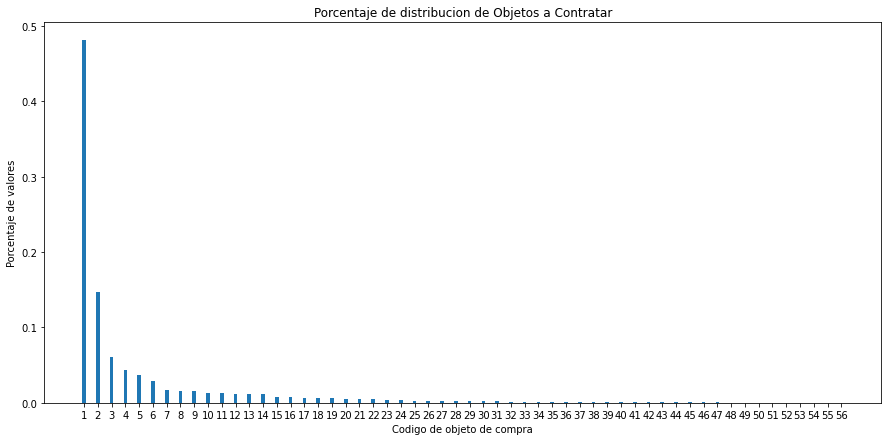

In [14]:
fig = plt.figure(figsize=(15,7));
pos = [3*i for i in range(1,len(objetos)+1)]
plt.bar(pos,objetos["Objeto a Contratar"]/len(df),
         tick_label=cods_obj);
plt.title("Porcentaje de distribucion de Objetos a Contratar");
plt.xlabel("Codigo de objeto de compra");
plt.ylabel("Porcentaje de valores");

## Identificación y preprocesamiento de variables
- Las variables *Orden Entidad, Tipo de Proceso, Estado de Proceso, Regimen de Contratacion, Objeto a Contratar, Tipo de Contrato* y *Origen de los Recursos* son **variables categóricas** con información textual.

- Las variables *Cuantia Contrato, Tiempo Adiciones en Dias, Tiempo Adiciones en Meses, Valor Total de Adiciones, Valor Sancion* son **variables numéricas** de la base de datos.

- Las variables *Marc Adiciones* y *Marc Sancion* son **outputs de interés**. Puede que **Marc Adiciones** también sea input y la única variable de salida de los modelos sea *Marc Sancion*.

- Se creará una sola columna que indique el tiempo en adiciones en días:
    - Si *Rango Ejec del Contrato* en días (D) entonces se usa ese valor
    - Si *Rango Ejec del Contrato* en días (M) entonces, asumiendo que cada día sea de 30 meses se calcula $30m + d$ donde $m$ es el tiempo adicionado en meses y $d$ el tiempo adicionado en días

In [17]:
# Usar OneHotEncoder
cat_cols = ["Orden Entidad","Tipo de Proceso","Estado del Proceso",
           "Regimen de Contratacion","Objeto a Contratar","Tipo de Contrato",
           "Origen de los Recursos"]
print("Numero de Nans por columna:")
print([(cat_cols[i], df[cat_cols[i]].isna().sum()) for i in range(len(cat_cols))])
#enc = preprocessing.OneHotEncoder(handle_unknown="ignore")
#enc.fit(df[])

Numero de Nans por columna:
[('Orden Entidad', 0), ('Tipo de Proceso', 0), ('Estado del Proceso', 0), ('Regimen de Contratacion', 4), ('Objeto a Contratar', 0), ('Tipo de Contrato', 0), ('Origen de los Recursos', 0)]


In [18]:
#null_rows = df.index[pd.isnull(df["Regimen de Contratacion"])]
#df.iloc[null_rows,:]
df[pd.isnull(df["Regimen de Contratacion"])]

,Orden Entidad,Tipo de Proceso,Estado del Proceso,Regimen de Contratacion,Objeto a Contratar,Tipo de Contrato,Nombre Grupo,Tipo Identifi del Contratista,Rango de Ejec del Contrato,Cuantia Contrato,Origen de los Recursos,Marc Adiciones,Tiempo Adiciones en Dias,Tiempo Adiciones en Meses,Valor Total de Adiciones,Marc Sancion,Valor Sancion,Regimen de contratacion
123225,DISTRITO CAPITAL,Iniciativa Privada sin recursos públicos,Finalizado el plazo para manifestaciones de in...,NaN,"Terrenos, Edificios, Estructuras y Vías",No definido,"[G] Terrenos, Edificios, Estructuras y vías",No Definido,N,0.0,No definido,0,0,0,0.0,0,0.0,nan
410080,DISTRITO CAPITAL,Iniciativa Privada sin recursos públicos,Publicación para manifestaciones de interés,NaN,"Terrenos, Edificios, Estructuras y Vías",No definido,"[G] Terrenos, Edificios, Estructuras y vías",No Definido,N,0.0,No definido,0,0,0,0.0,0,0.0,nan
472437,DISTRITO CAPITAL,Iniciativa Privada sin recursos públicos,Publicación para manifestaciones de interés,NaN,"Terrenos, Edificios, Estructuras y Vías",No definido,"[G] Terrenos, Edificios, Estructuras y vías",No Definido,N,0.0,No definido,0,0,0,0.0,0,0.0,nan
492844,DISTRITO CAPITAL,Iniciativa Privada sin recursos públicos,Finalizado el plazo para manifestaciones de in...,NaN,"Terrenos, Edificios, Estructuras y Vías",No definido,"[G] Terrenos, Edificios, Estructuras y vías",No Definido,N,0.0,No definido,0,0,0,0.0,0,0.0,nan


Se pueden descartar esas filas ya que son muy pocas y no tienen información relevante.

In [19]:
df = df[~pd.isnull(df["Regimen de Contratacion"])]

# Modelos
Los  modelos de clasificación que se probarán son:
1. K-Nearest Neighbors
2. Modelos Bayesianos
3. SVM

Cada uno de estos modelos se probará utilizando como inputs y outputs las variables de la siguiente manera:
1. **Inputs**: categóricas (textuales), Marc Adiciones y variables numéricas, **Output**: Marc Sancion
2. **Inputs**: categóricas (textuales), variables numéricas, **Output**: Marc Sancion
3. **Inputs**: categóricas (textuales), variables numéricas, **Output**: Marc Adiciones

**Nota:** hay que manejar con cuidado el desbalance de las proporciones de los datos, de lo contrario los modelos quedan sesgados

In [20]:
df.columns

Index(['Orden Entidad', 'Tipo de Proceso', 'Estado del Proceso',
       'Regimen de Contratacion', 'Objeto a Contratar', 'Tipo de Contrato',
       'Nombre Grupo', 'Tipo Identifi del Contratista',
       'Rango de Ejec del Contrato', 'Cuantia Contrato',
       'Origen de los Recursos', 'Marc Adiciones', 'Tiempo Adiciones en Dias',
       'Tiempo Adiciones en Meses', 'Valor Total de Adiciones', 'Marc Sancion',
       'Valor Sancion', 'Regimen de contratacion'],
      dtype='object')

---
# Análisis de correlaciones entre Inputs y Output
## Ayudas
- Test chi cuadrado
- Cramers'V
- Bonferroni Correction

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
# Columnas con texto categoricas
# ['Orden Entidad','Tipo de Proceso','Estado del Proceso','Regimen de Contratacion','Objeto a Contratar','Tipo de Contrato','Origen de los Recursos']
#Transformación de texto a codigos con OneHotencoder
enc = OneHotEncoder()
enc.fit(df[cat_cols])
# enc.categories: arreglo con nombre de categorias porcolumna

OneHotEncoder()

In [24]:
# Diccionario de diccionarios de codigos para cada columna categorica
dic_cods = dict()
for i in range(len(enc.categories_)):
    d = dict()
    for j in range(len(enc.categories_[i])):
        d[enc.categories_[i][j]] = j
    dic_cods[cat_cols[i]] = d

In [25]:
from copy import deepcopy

In [26]:
# Reemplazando texto por codigos
df_cod = deepcopy(df)
for name in cat_cols:
    df_cod = df_cod.replace({name:dic_cods[name]})

In [27]:
# df_cod es el mismo dataset pero con las variables categoricas codificadas
df_cod.head()

,Orden Entidad,Tipo de Proceso,Estado del Proceso,Regimen de Contratacion,Objeto a Contratar,Tipo de Contrato,Nombre Grupo,Tipo Identifi del Contratista,Rango de Ejec del Contrato,Cuantia Contrato,Origen de los Recursos,Marc Adiciones,Tiempo Adiciones en Dias,Tiempo Adiciones en Meses,Valor Total de Adiciones,Marc Sancion,Valor Sancion,Regimen de contratacion
0,0,9,2,2,54,11,"[G] Terrenos, Edificios, Estructuras y vías",Nit de Persona Jurídica,D,4990600.0,11,0,0,0,0.0,0,0.0,Régimen Especial
1,0,9,2,2,43,13,[F] Servicios,Nit de Persona Jurídica,M,2518660.0,1,0,0,0,0.0,0,0.0,Régimen Especial
2,2,4,2,0,47,13,[F] Servicios,Cédula de Ciudadanía,M,62400000.0,1,0,0,0,0.0,0,0.0,Estatuto General de Contratación
3,4,9,2,2,51,13,[F] Servicios,Cédula de Ciudadanía,D,1060200.0,1,0,0,0,0.0,0,0.0,Régimen Especial
4,0,4,2,0,41,13,[F] Servicios,Nit de Persona Natural,D,2317005.0,1,0,0,0,0.0,0,0.0,Estatuto General de Contratación


# Remuestreo para balancear clases

In [28]:
df_0 = df[df["Marc Sancion"]==0].sample(n=5000,replace=True,random_state=0)
df_1 = df[df["Marc Sancion"]==1].sample(n=5000,replace=True,random_state=0)

df_sample = pd.concat([df_0,df_1],axis=0)

df_sample = df_sample.sample(frac=1).reset_index(drop=True)

# 1. Inputs textuales + Marc_sancion, output: Marc Sancion

## 1.1 Análisis de correlación inputs categóricos y output Marc Sancion categorico
La correlación entre dos variables categóricas se puede medir con las siguientes técnicas: **test chi cuadrado, Cramers's V**.\
Primero analicemos analicemos con el test de Chi cuadrado.

In [29]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [30]:
def chi2_test(var1,var2,prob=0.95):
    """
    Determina si 2 variables categoricas tienen algún tipo de correlacion con test de chi cuadrado
    args:
        var1: variable 1
        var2: variable 2
        prob: nivel de confianza para test, por defecto 95%
    returns:
        metricas de test
    """
    table = pd.crosstab(var1,var2)
    # Estadistico cho2, p-valor, grados de libertad estimados y frecuencias estimadas
    # basado en sumas marginales de la tabla
    stat,p,dof,expected = chi2_contingency(table)
    print("Degrees of freedom (Dof): ", dof)
    #print(expected)
    #prob = 0.95
    # Percent point function, inverse distribution function
    # Calcula probabilidad que la variable sea menor o igual que x dado un x
    # interpret statistic
    critical=chi2.ppf(prob,dof)
    print("Probability = %.3f, critical = %.3f, stat = %.3f" % (prob,critical,stat))
    if abs(stat) >=critical:
        print("Dependent (reject H0)")
    else:
        print("Independent (fail to reject H0)")
    # interpet p-value
    alpha = 1.0-prob
    print("Significance = %.3f, p-value = %.3f" % (alpha,p))
    if p <=alpha:
        print("Dependent (reject H0)")
    else:
        print("Independent (fail to reject H0)")

### Entre Orden Entidad y Marc Sancion

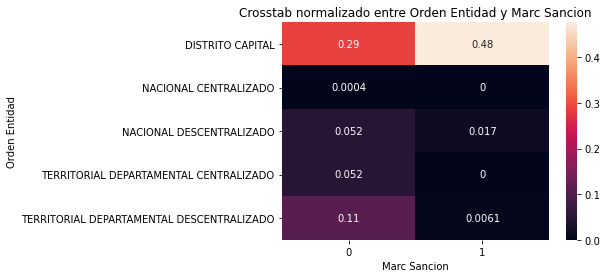

In [31]:
col1 = "Orden Entidad"
col2 = "Marc Sancion"
sns.heatmap(pd.crosstab(df_sample[col1],df_sample[col2],normalize=True),annot=True);
plt.title("Crosstab normalizado entre "+col1+ " y "+col2);

In [32]:
table = pd.crosstab(df["Orden Entidad"],df["Marc Sancion"])
table

Marc Sancion,0,1
Orden Entidad,,
DISTRITO CAPITAL,384544,251
NACIONAL CENTRALIZADO,392,0
NACIONAL DESCENTRALIZADO,64398,10
TERRITORIAL DEPARTAMENTAL CENTRALIZADO,65154,0
TERRITORIAL DEPARTAMENTAL DESCENTRALIZADO,141228,3


In [33]:
chi2_test(df_sample["Orden Entidad"],df_sample["Marc Sancion"],prob=0.95)

Degrees of freedom (Dof):  4
Probability = 0.950, critical = 9.488, stat = 2100.504
Dependent (reject H0)
Significance = 0.050, p-value = 0.000
Dependent (reject H0)


### Entre tipo de Proceso y Marc Sancion

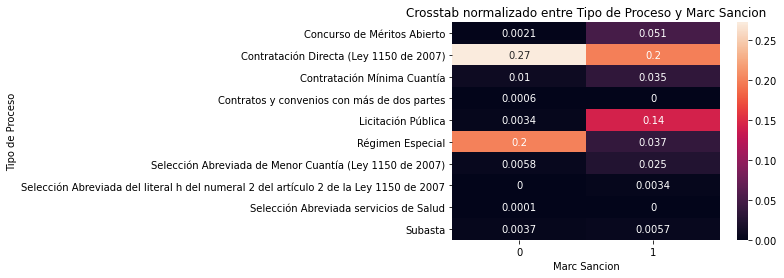

In [34]:
col1 = "Tipo de Proceso"
col2 = "Marc Sancion"
sns.heatmap(pd.crosstab(df_sample[col1],df_sample[col2],normalize=True),annot=True);
plt.title("Crosstab normalizado entre "+col1+ " y "+col2);

In [35]:
table = pd.crosstab(df_sample["Tipo de Proceso"],df_sample["Marc Sancion"])
chi2_test(df_sample["Tipo de Proceso"],df_sample["Marc Sancion"],prob=0.95)

Degrees of freedom (Dof):  9
Probability = 0.950, critical = 16.919, stat = 3322.982
Dependent (reject H0)
Significance = 0.050, p-value = 0.000
Dependent (reject H0)


## Entre Estado del Proceso y Marc Sancion

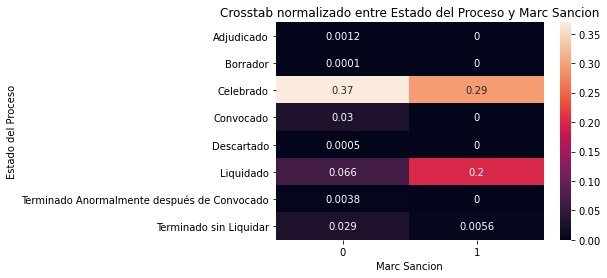

In [36]:
col1 = "Estado del Proceso"
col2 = "Marc Sancion"
sns.heatmap(pd.crosstab(df_sample[col1],df_sample[col2],normalize=True),annot=True);
plt.title("Crosstab normalizado entre "+col1+ " y "+col2);

In [37]:
chi2_test(df_sample["Estado del Proceso"],df_sample["Marc Sancion"],prob=0.95)

Degrees of freedom (Dof):  7
Probability = 0.950, critical = 14.067, stat = 1270.556
Dependent (reject H0)
Significance = 0.050, p-value = 0.000
Dependent (reject H0)


## Entre Regimen de Contratacion y Marc Sancion

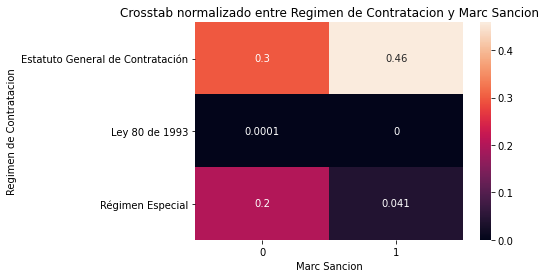

In [38]:
col1 = "Regimen de Contratacion"
col2 = "Marc Sancion"
sns.heatmap(pd.crosstab(df_sample[col1],df_sample[col2],normalize=True),annot=True);
plt.title("Crosstab normalizado entre "+col1+ " y "+col2);

In [39]:
chi2_test(df_sample["Regimen de Contratacion"],df_sample["Marc Sancion"],prob=0.95)

Degrees of freedom (Dof):  2
Probability = 0.950, critical = 5.991, stat = 1406.103
Dependent (reject H0)
Significance = 0.050, p-value = 0.000
Dependent (reject H0)


## Entre Objeto a Contratar y Marc Sancion 

In [40]:
len(df_sample["Objeto a Contratar"].value_counts())

54

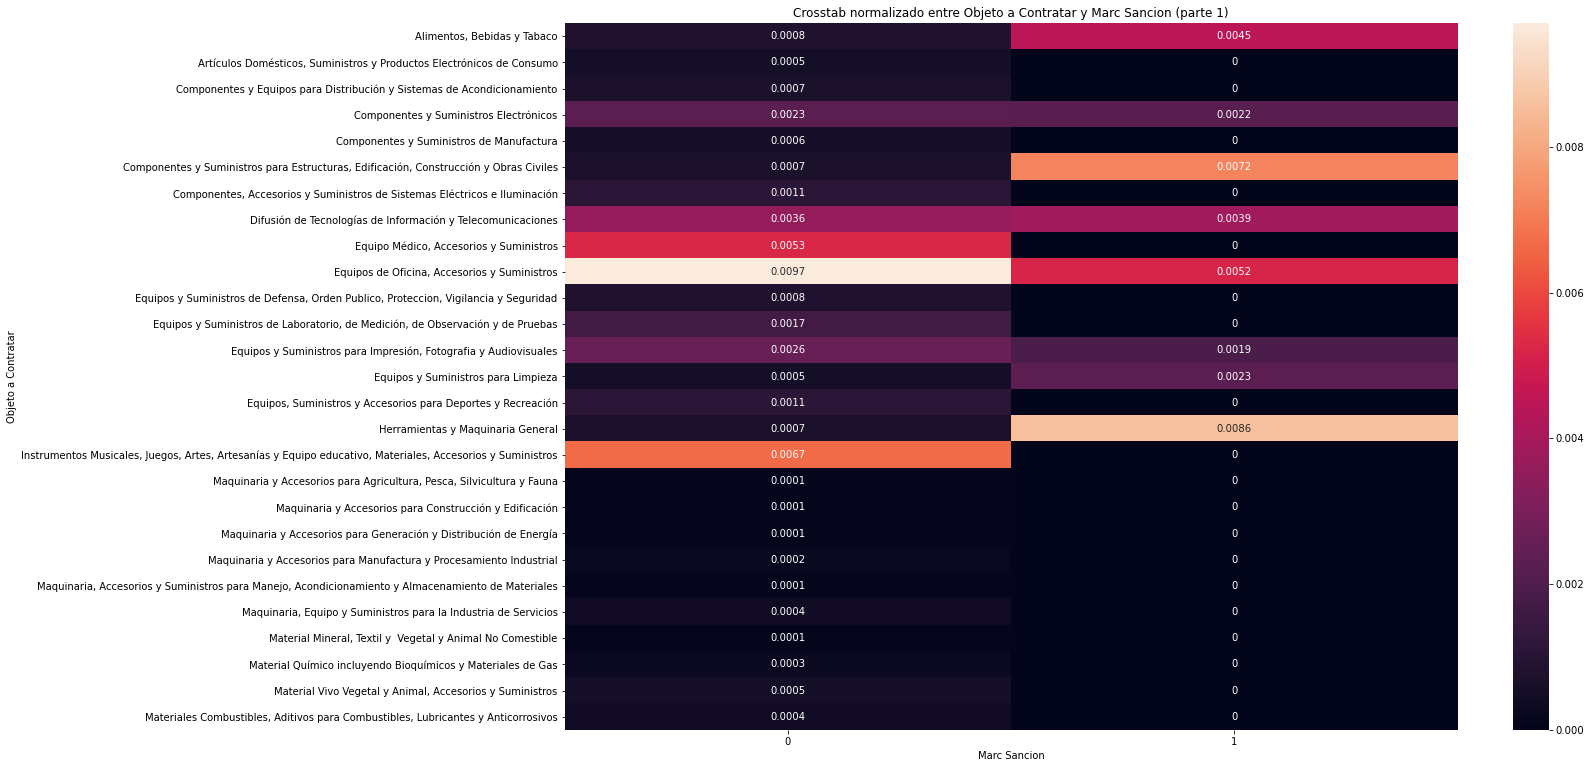

In [41]:
col1 = "Objeto a Contratar"
col2 = "Marc Sancion"
tab_norm = pd.crosstab(df_sample[col1],df_sample[col2],normalize=True)
fig = plt.figure(figsize=(20,13))
sns.heatmap(tab_norm.iloc[:int(len(tab_norm)/2.0),:],annot=True);
plt.title("Crosstab normalizado entre "+col1+ " y "+col2 + " (parte 1)");

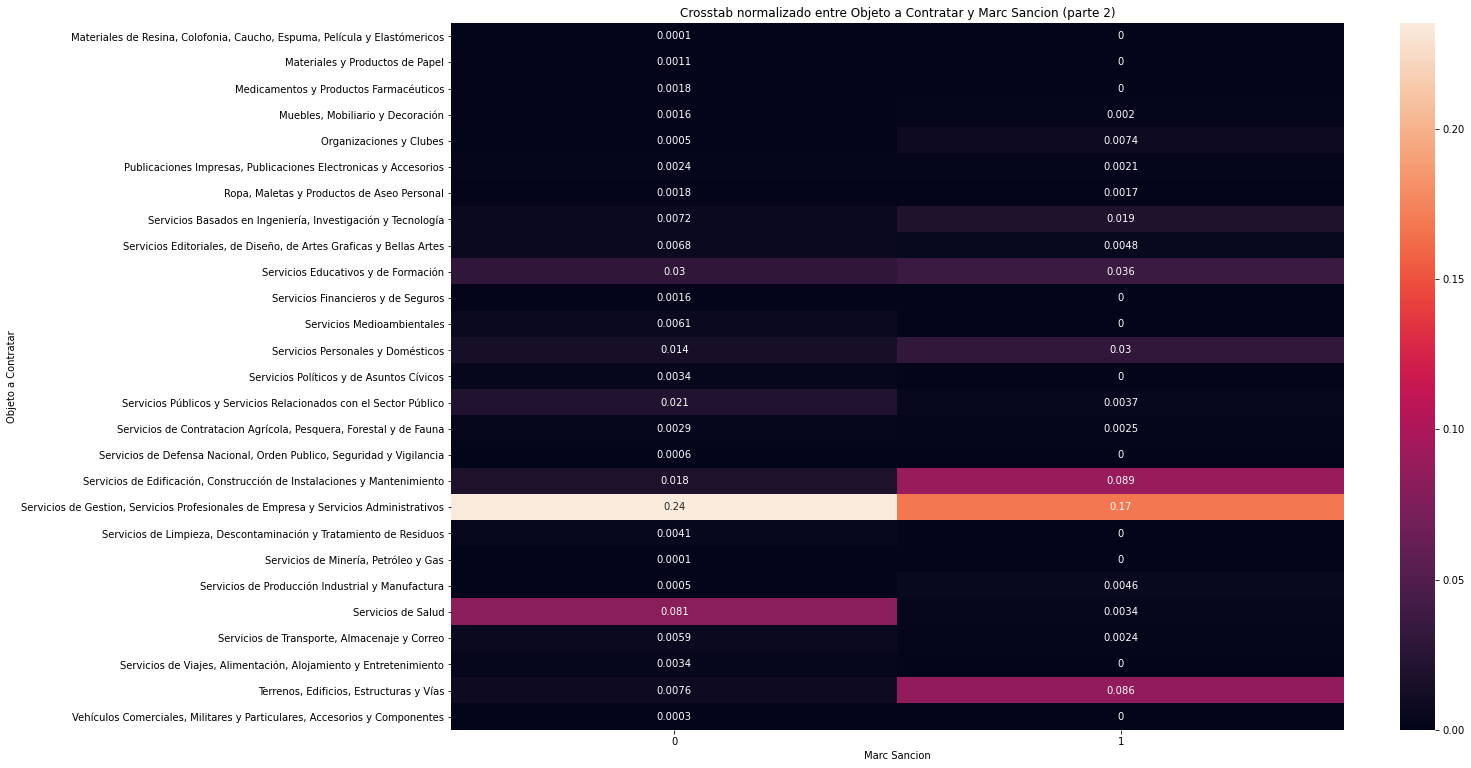

In [42]:
fig = plt.figure(figsize=(20,13))
sns.heatmap(tab_norm.iloc[int(len(tab_norm)/2.0):,:],annot=True);
plt.title("Crosstab normalizado entre "+col1+ " y "+col2 + " (parte 2)");

In [43]:
chi2_test(df_sample["Objeto a Contratar"],df_sample["Marc Sancion"],prob=0.95)

Degrees of freedom (Dof):  53
Probability = 0.950, critical = 70.993, stat = 2919.584
Dependent (reject H0)
Significance = 0.050, p-value = 0.000
Dependent (reject H0)


## Entre Tipo de Contrato y Marc Sancion

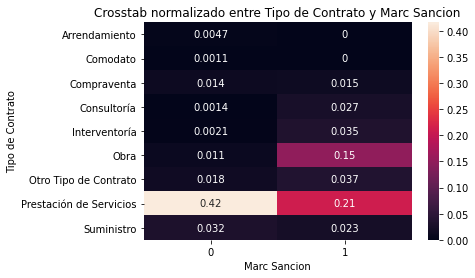

In [44]:
col1 = "Tipo de Contrato"
col2 = "Marc Sancion"
sns.heatmap(pd.crosstab(df_sample[col1],df_sample[col2],normalize=True),annot=True);
plt.title("Crosstab normalizado entre "+col1+ " y "+col2);

In [45]:
chi2_test(df_sample["Tipo de Contrato"],df_sample["Marc Sancion"],prob=0.95)

Degrees of freedom (Dof):  8
Probability = 0.950, critical = 15.507, stat = 2515.955
Dependent (reject H0)
Significance = 0.050, p-value = 0.000
Dependent (reject H0)


## Entre Origen de los Recursos y Marc Sancion

C:\Users\juanc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juanc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


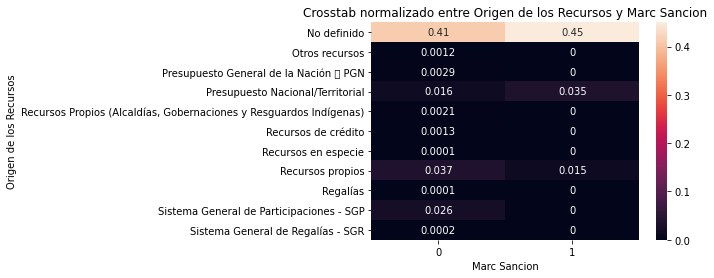

In [46]:
col1 = "Origen de los Recursos"
col2 = "Marc Sancion"
sns.heatmap(pd.crosstab(df_sample[col1],df_sample[col2],normalize=True),annot=True);
plt.title("Crosstab normalizado entre "+col1+ " y "+col2);

In [47]:
chi2_test(df_sample["Origen de los Recursos"],df_sample["Marc Sancion"],prob=0.95)

Degrees of freedom (Dof):  10
Probability = 0.950, critical = 18.307, stat = 527.711
Dependent (reject H0)
Significance = 0.050, p-value = 0.000
Dependent (reject H0)


## Entre Marc Adicion y Marc Sancion

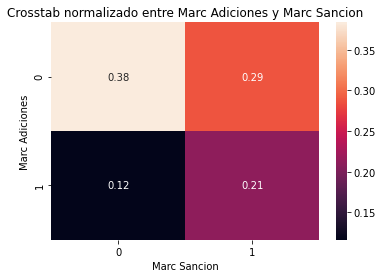

In [48]:
col1 = "Marc Adiciones"
col2 = "Marc Sancion"
sns.heatmap(pd.crosstab(df_sample[col1],df_sample[col2],normalize=True),annot=True);
plt.title("Crosstab normalizado entre "+col1+ " y "+col2);

In [49]:
chi2_test(df_sample["Marc Adiciones"],df_sample["Marc Sancion"],prob=0.95)

Degrees of freedom (Dof):  1
Probability = 0.950, critical = 3.841, stat = 413.517
Dependent (reject H0)
Significance = 0.050, p-value = 0.000
Dependent (reject H0)


## Entre Variables numéricas y Marc Sancion
Las variables numéricas son *Cuantia Contrato, Valor Total de Adiciones* y una nueva variable llamada *Adiciones en Dias*. Esta última representa el timepo adicionado en días, construida a partir de *Rango de Ejec del Contrato* asumiendo que si *Rango de Ejec del Contrato* es M entonces la cada se suma *Tiempo Adiciones en Meses* $\times$ 30 a *Tiempo Adiciones en Dias*.

La correlación entre variables numéricas y una variable categórica se puede calcular con la **correlación de punto biserial**.
Las hipótesis para esta correlación son iguales a cualquier test de correlación:
- **La hipótesis nula $H_0$ es que  no hay una correlación significativa entre las variables**. 
- Si el p-valor es menor que el nivel de significancia $\alpha$ (en general de 0.05) se rechaza la hipótesis nula. Más info [aquí](https://towardsdatascience.com/eveything-you-need-to-know-about-interpreting-correlations-2c485841c0b8#:~:text=A%20p%2Dvalue%20is%20the,sample%20occurred%20due%20to%20chance.).

## Entre Cuantia Contrato y Marc Sancion

In [50]:
from scipy import stats

In [51]:
# stats.pointbiserialr(a, b): retorna el coeficiente de correlación y el p-valor
# a: variable binaria, b: variable continua
stats.pointbiserialr(df_sample["Marc Sancion"], df_sample["Cuantia Contrato"])

PointbiserialrResult(correlation=0.2728018140129516, pvalue=3.6900787420293566e-170)

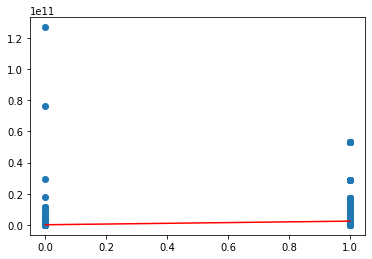

In [52]:
y0 = df_0["Cuantia Contrato"].mean()
y1 = df_1["Cuantia Contrato"].mean()
plt.scatter(df_sample["Marc Sancion"], df_sample["Cuantia Contrato"]);
plt.plot([0,1],[y0,y1],'r');

## Entre Valor total de las adiciones y Marc Sancion

In [53]:
stats.pointbiserialr(df_sample["Marc Sancion"], df_sample["Valor Total de Adiciones"])

PointbiserialrResult(correlation=0.2288742390684863, pvalue=5.34836369185016e-119)

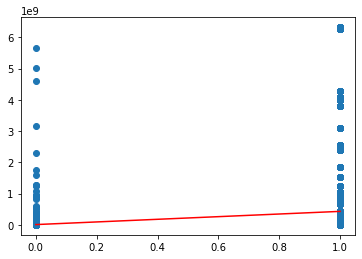

In [54]:
y0 = df_0["Valor Total de Adiciones"].mean()
y1 = df_1["Valor Total de Adiciones"].mean()
plt.scatter(df_sample["Marc Sancion"], df_sample["Valor Total de Adiciones"]);
plt.plot([0,1],[y0,y1],'r');

## Entre Adiciones en dias y Marc Sancion

In [55]:
dias = np.zeros(len(df_sample))
for i in range(len(df_sample)):
    if df_sample["Rango de Ejec del Contrato"][i] == "M":
        dias[i] = 30*df_sample["Tiempo Adiciones en Meses"][i] + df_sample["Tiempo Adiciones en Dias"][i]
    else:
        dias[i] = df_sample["Tiempo Adiciones en Dias"][i]
df_sample["Adiciones en Dias"] = dias

In [56]:
stats.pointbiserialr(df_sample["Marc Sancion"], df_sample["Adiciones en Dias"])

PointbiserialrResult(correlation=0.18241556281090687, pvalue=1.4727245757264226e-75)

## Conclusiones para variables categóricas:
- Por ahora, se descarta *Orden Entidad*
- Validar listados de entidades de orden Nacional Centralizado,..., con valores pequeños según crosstab
- Considerar modelos  **sin** Prestación de servicios
- Descartar *Estado del Proceso*
- Calcular probabilidades condicioneales con tabla de *Marc Adiciones* y *Marc Sancion*
- Calcular porcentajes de Adición con respecto a *Cuantia Contrato*, el output es *Marc Sancion*.
- **Modelos a probar: regresión logística, árbol de desición**
- Considerar tiempos de aducuibes cuando output es *Marc Sancion*
- Utilizar **Random Forest** para selección de predictores

**Nota:** hacer corrstabs como graficas de barras

## Regresión logística
Primero creamos variables categóricas con dummies (1 y 0).

In [57]:
# cat_vars = ['Orden Entidad','Tipo de Proceso','Estado del Proceso','Regimen de Contratacion','Objeto a Contratar','Tipo de Contrato','Origen de los Recursos', "Marc Adiciones"]
cat_vars = ['Orden Entidad','Tipo de Proceso','Estado del Proceso','Regimen de Contratacion',
            'Objeto a Contratar','Tipo de Contrato','Origen de los Recursos']
df_cat = pd.DataFrame()
for var in cat_vars:
    df_dum = pd.get_dummies(df[var])
    # Diccionario para cambiar nombres
    dic_new_names = dict()
    for cat in df_dum.columns:
        dic_new_names[cat] = str(var)+"_"+str(cat)
    # Aclarando nombre de variables categoricas
    df_dum = df_dum.rename(columns=dic_new_names)
    # Se pega el dataframe de dummies
    df_cat = pd.concat([df_cat,df_dum],axis=1)

Ahora *df_cat* es un data frame con las variables categóricas por dummies

In [58]:
# Creacion de variable Adiciones en Dias para el dataframe principal
dias = np.zeros(len(df))
for i in range(len(df)):
    # Casos en los que se detiene
    if i in {123225,410080,472437,492844}:
        dias[i] = 0
    elif df["Rango de Ejec del Contrato"][i] == "M":
        dias[i] = 30*df["Tiempo Adiciones en Meses"][i] + df["Tiempo Adiciones en Dias"][i]
    elif df["Rango de Ejec del Contrato"][i] == "D":
        dias[i] = df["Tiempo Adiciones en Dias"][i]
df["Adiciones en Dias"] = dias

In [59]:
# Pegamos las variables numéricas con df_cat
df_cat = pd.concat([df_cat,df[["Cuantia Contrato", "Valor Total de Adiciones",
                               "Adiciones en Dias","Marc Sancion", "Marc Adiciones"]]],axis=1)

In [60]:
list(df_cat.columns)

['Orden Entidad_DISTRITO CAPITAL',
 'Orden Entidad_NACIONAL CENTRALIZADO',
 'Orden Entidad_NACIONAL DESCENTRALIZADO',
 'Orden Entidad_TERRITORIAL DEPARTAMENTAL CENTRALIZADO',
 'Orden Entidad_TERRITORIAL DEPARTAMENTAL DESCENTRALIZADO',
 'Tipo de Proceso_Asociación Público Privada',
 'Tipo de Proceso_Concurso de Méritos Abierto',
 'Tipo de Proceso_Concurso de Méritos con Lista Corta',
 'Tipo de Proceso_Concurso de Méritos con Lista Multiusos',
 'Tipo de Proceso_Contratación Directa (Ley 1150 de 2007)',
 'Tipo de Proceso_Contratación Mínima Cuantía',
 'Tipo de Proceso_Contratos y convenios con más de dos partes',
 'Tipo de Proceso_Licitación Pública',
 'Tipo de Proceso_Licitación obra pública',
 'Tipo de Proceso_Régimen Especial',
 'Tipo de Proceso_Selección Abreviada de Menor Cuantía (Ley 1150 de 2007)',
 'Tipo de Proceso_Selección Abreviada del literal h del numeral 2 del artículo 2 de la Ley 1150 de 2007',
 'Tipo de Proceso_Selección Abreviada servicios de Salud',
 'Tipo de Proceso_Sub

In [61]:
print(df_cat["Marc Sancion"].value_counts())
print(df_cat.shape)

0    655716
1       264
Name: Marc Sancion, dtype: int64
(655980, 121)


In [62]:
# Balanceo de clases se puede hacer con SMOTE en python
# Por ahora, se elige  muestrea 5000 datos de la clase 0 y remuestrea 5000 de la clase 1
df_cat_0 = df_cat[df_cat["Marc Sancion"]==0].sample(n=5000,replace=True,random_state=0)
df_cat_1 = df_cat[df_cat["Marc Sancion"]==1].sample(n=5000,replace=True,random_state=0)

df_cat_sample = pd.concat([df_cat_0,df_cat_1],axis=0)

df_cat_sample = df_cat_sample.sample(frac=1).reset_index(drop=True)

## Con SMOTE (Synthetic Minority Oversampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X = df_cat.loc[:,[c for c in df_cat.columns]]

## Selección de variables con Recursive Feature Extraction (RFE)
Esta técnica selecciona variables considerando conjuntos cada vez más pequeños de variables, inicialmente se entrena con el conjunto de datos inicial. A medida que itera, descarta las variables menos importantes.

In [129]:
X = df_cat_sample.loc[:,[n for n in df_cat_sample.columns  if n!= "Marc Sancion"]]
y = df_cat_sample["Marc Sancion"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
list(X.columns)

['Orden Entidad_DISTRITO CAPITAL',
 'Orden Entidad_NACIONAL CENTRALIZADO',
 'Orden Entidad_NACIONAL DESCENTRALIZADO',
 'Orden Entidad_TERRITORIAL DEPARTAMENTAL CENTRALIZADO',
 'Orden Entidad_TERRITORIAL DEPARTAMENTAL DESCENTRALIZADO',
 'Tipo de Proceso_Asociación Público Privada',
 'Tipo de Proceso_Concurso de Méritos Abierto',
 'Tipo de Proceso_Concurso de Méritos con Lista Corta',
 'Tipo de Proceso_Concurso de Méritos con Lista Multiusos',
 'Tipo de Proceso_Contratación Directa (Ley 1150 de 2007)',
 'Tipo de Proceso_Contratación Mínima Cuantía',
 'Tipo de Proceso_Contratos y convenios con más de dos partes',
 'Tipo de Proceso_Licitación Pública',
 'Tipo de Proceso_Licitación obra pública',
 'Tipo de Proceso_Régimen Especial',
 'Tipo de Proceso_Selección Abreviada de Menor Cuantía (Ley 1150 de 2007)',
 'Tipo de Proceso_Selección Abreviada del literal h del numeral 2 del artículo 2 de la Ley 1150 de 2007',
 'Tipo de Proceso_Selección Abreviada servicios de Salud',
 'Tipo de Proceso_Sub

In [131]:
logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select = 30)
rfe = rfe.fit(X,y)

In [132]:
#list(df_cat_sample.columns[rfe.support_.reshape(30)])
best_cols_idx = np.where(rfe.support_ == True)
best_cols = df_cat_sample.columns[best_cols_idx]
best_cols = [c for c in best_cols if c != "Marc Sancion"]

In [133]:
best_cols

['Orden Entidad_DISTRITO CAPITAL',
 'Orden Entidad_NACIONAL DESCENTRALIZADO',
 'Orden Entidad_TERRITORIAL DEPARTAMENTAL CENTRALIZADO',
 'Orden Entidad_TERRITORIAL DEPARTAMENTAL DESCENTRALIZADO',
 'Tipo de Proceso_Concurso de Méritos Abierto',
 'Tipo de Proceso_Contratación Directa (Ley 1150 de 2007)',
 'Tipo de Proceso_Contratación Mínima Cuantía',
 'Tipo de Proceso_Licitación Pública',
 'Tipo de Proceso_Régimen Especial',
 'Estado del Proceso_Celebrado',
 'Estado del Proceso_Convocado',
 'Estado del Proceso_Liquidado',
 'Estado del Proceso_Terminado sin Liquidar',
 'Regimen de Contratacion_Régimen Especial',
 'Objeto a Contratar_Servicios Personales y Domésticos',
 'Objeto a Contratar_Servicios Públicos y Servicios Relacionados con el Sector Público',
 'Objeto a Contratar_Servicios de Gestion, Servicios Profesionales de Empresa y Servicios Administrativos',
 'Objeto a Contratar_Servicios de Salud',
 'Tipo de Contrato_Consultoría',
 'Tipo de Contrato_Interventoría',
 'Tipo de Contrato_

In [136]:
# Con las variables seleccionadas
X = df_cat_sample[best_cols]
y = df_cat_sample["Marc Sancion"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
logit_model=sm.Logit(y,X)
result=logit_model.fit(method='bfgs',maxiter=200)
print(result.summary2())

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3
                                                                Results: Logit
Model:                                        Logit                                      Pseudo R-squared:                           0.000     
Dependent Variable:                           Marc Sancion                               AIC:                                        13920.9436
Date:                                         2021-03-12 09:44                           BIC:                                        14130.0435
No. Observations:                             10000                                      Log-Likelihood:                             -6931.5   
Df Model:                                     28                                         LL-Null:                                    -6931.5   
Df Residuals:                                 9971                   

C:\Users\juanc\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\juanc\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\juanc\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\juanc\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\juanc\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\juanc\anaconda3\lib\site-packages\statsmodels\base\model.py:566: Conv

In [138]:
from sklearn import metrics

In [139]:
print(y_train.value_counts())
print("-------------")
print(y_test.value_counts())

1    4020
0    3980
Name: Marc Sancion, dtype: int64
-------------
0    1020
1     980
Name: Marc Sancion, dtype: int64


In [140]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [141]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.54


In [142]:
def plotCM(ytrue, ypred, titulo, clases=None, normalize = False, ax = None):
    """ Funcion para calcular y visualizar la matriz de confusion"""
    
    if clases == None:
        clases = list(set(ytrue))
        clases.sort() # etiquetas unicas ordenadas alfabeticamente
    
    CM = confusion_matrix(ytrue,ypred, labels=clases)
    
    #Normaliza la matriz de confusion dividiendo cada fila por el total de verdaderos
    if normalize:
        CM = 100*CM / CM.sum(axis=1).reshape(-1,1) #Aprovechando el Broadcasting!
 
    df = pd.DataFrame(CM, index=clases, columns=clases)
    df.index.name = 'True'; df.columns.name = 'Predicted'
    
    sns.heatmap( df, # Visualizando la matriz de confusion
             annot=True, fmt='2.1f', cmap='ocean_r',cbar=False,square=True, annot_kws={'fontsize':16}, ax=ax )
    plt.title(titulo)
    plt.show()

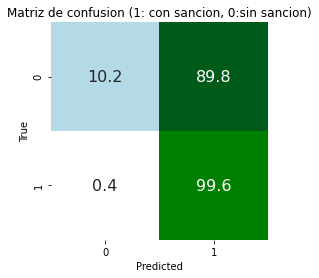

In [143]:
plotCM(y_test,y_pred,"Matriz de confusion (1: con sancion, 0:sin sancion)",
      normalize=True)

In [144]:
from sklearn.metrics import classification_report

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.10      0.18      1020
           1       0.52      1.00      0.68       980

    accuracy                           0.54      2000
   macro avg       0.74      0.55      0.43      2000
weighted avg       0.74      0.54      0.43      2000



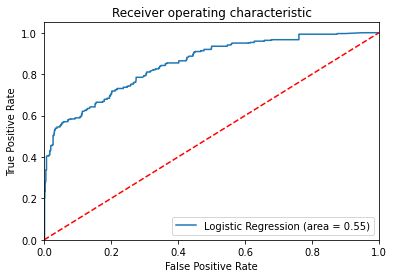

In [146]:
# Grafica ROC AUC
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [148]:
# Validación cruzada:
logreg = LogisticRegression()
cv_scores = cross_val_score(logreg,X_train,y_train,cv=5)
cv_scores

array([0.53625, 0.5425 , 0.5475 , 0.54   , 0.55   ])

## Selección de variables con conclusiones iniciales y quitando Contrato por prestacion de servicios

In [149]:
list(df_cat.columns)

['Orden Entidad_DISTRITO CAPITAL',
 'Orden Entidad_NACIONAL CENTRALIZADO',
 'Orden Entidad_NACIONAL DESCENTRALIZADO',
 'Orden Entidad_TERRITORIAL DEPARTAMENTAL CENTRALIZADO',
 'Orden Entidad_TERRITORIAL DEPARTAMENTAL DESCENTRALIZADO',
 'Tipo de Proceso_Asociación Público Privada',
 'Tipo de Proceso_Concurso de Méritos Abierto',
 'Tipo de Proceso_Concurso de Méritos con Lista Corta',
 'Tipo de Proceso_Concurso de Méritos con Lista Multiusos',
 'Tipo de Proceso_Contratación Directa (Ley 1150 de 2007)',
 'Tipo de Proceso_Contratación Mínima Cuantía',
 'Tipo de Proceso_Contratos y convenios con más de dos partes',
 'Tipo de Proceso_Licitación Pública',
 'Tipo de Proceso_Licitación obra pública',
 'Tipo de Proceso_Régimen Especial',
 'Tipo de Proceso_Selección Abreviada de Menor Cuantía (Ley 1150 de 2007)',
 'Tipo de Proceso_Selección Abreviada del literal h del numeral 2 del artículo 2 de la Ley 1150 de 2007',
 'Tipo de Proceso_Selección Abreviada servicios de Salud',
 'Tipo de Proceso_Sub

In [150]:
# Sin Orden Entidad, sin Tipo de Contrato_ Prestación de Servicios
cols = [n for n in df_cat.columns if "Orden Entidad" not in n]
df2 = df_cat[cols]
df2 = df2[df2['Tipo de Contrato_Prestación de Servicios'] == 0]
print(df2.shape)
print(df2["Marc Sancion"].value_counts())

(112434, 116)
0    112283
1       151
Name: Marc Sancion, dtype: int64


In [151]:
# Balanceando clases
df2_0 = df2[df2["Marc Sancion"]==0].sample(n=5000,replace=True,random_state=0)
df2_1 = df[df_cat["Marc Sancion"]==1].sample(n=5000,replace=True,random_state=0)

df2_sample = pd.concat([df2_0,df2_1],axis=0)

df2_sample = df_cat_sample.sample(frac=1).reset_index(drop=True)

In [152]:
X = df2_sample.loc[:,[n for n in df2_sample.columns if n != "Marc Sancion"]]
y = df2_sample["Marc Sancion"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [154]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.54


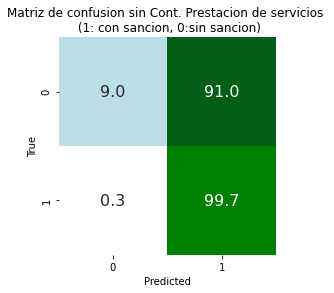

In [155]:
plotCM(y_test,y_pred,"Matriz de confusion sin Cont. Prestacion de servicios \n (1: con sancion, 0:sin sancion)",
      normalize=True)

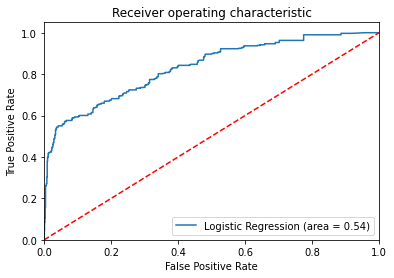

In [156]:
# Grafica ROC AUC
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [157]:
# Validación cruzada:
logreg = LogisticRegression()
cv_scores = cross_val_score(logreg,X_train,y_train,cv=5)
cv_scores

array([0.54125 , 0.545625, 0.5375  , 0.544375, 0.545625])

# Modelos para detectar contratos con adiciones - SECOP I
En este notebook se realiza la prueba de posibles modelos predictivos con los cuales se pretende detectar anomalías en la contratación pública de Bogotá. Se usa como insumo la base de datos SECOP_I_MASTER2.

Base con la cual se proceden a realizar modelos de clasificación binarios para 3 diferentes variables objetivo que determinan si el contrato tuvo alguna adición del respectivo tipo o no; `Marc Adiciones`,`Adiciones en Valor` y `Adiciones en Valor`. Adicionalmente, se realizan modelos con y sin incluir los modelos con prestacion de servicios.

**Implementación de modelos después de análisis exploratorio y de selección de variables**

- Buscar útilidad de AIC Y BIC para modelos de clasificación y su calculo.https://stackoverflow.com/questions/48185090/how-to-get-the-log-likelihood-for-a-logistic-regression-model-in-sklearn
- Probar elección de hiperparámetros con métrica fbeta.
- Balancear hacia arriba los datos para modelos de contratos diferentes a prestación de servicio debido al bajo número de observaciones.
- Paper Jorge y Juan David revisar consistencia.
- Visualizar arbol de decisión sencillo.
- Segunda versión del reporte 2, incluye sección de EDA y modelos implementados en sección 4. También solucionar 

# Funciones auxiliares

In [186]:
# Gráficas
def corr_Matrix(data):
    '''
    Gráfica la matríz de correlación entre todas las variables 
    de la base de datos usada.
    '''
    f,ax = plt.subplots(figsize = (15,14))
    sns.heatmap(data.corr(),cmap = 'ocean_r', annot = True, cbar = False )
    ax.set_title('Correlation matrix')
    plt.show()


def plot_ROC(model, X_test, y_test, scaler, model_name='Model'):
    '''
    Gráfica la curva ROC y calcula el AUC para un modelo entrenado dados unos datos de prueba.
    Entradas:
            model: modelo sklearn entrenado del que se usa el método predict_proba()
            X_test: variables independientes de prueba.
            Y_test: variable dependiente de prueba.
            scaler: objeto preprocessing.StandardScaler() entrenado junto al modelo para escalar X_test.
            model_name: string con el nombre del modelo que se pasa para usar como leyenda de la curva ROC
    Salida:
            Gráfica curva ROC e impresión del AUC.
    '''
    ns_probs = [0 for _ in range(len(y_test))]
    lr_probs = model.predict_proba(scaler.transform(X_test))
    lr_probs = lr_probs[:, 1]
    
    lr_auc = roc_auc_score(y_test, lr_probs)
    print("Model: ROC AUC = {:1.3f}".format(lr_auc))

    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

    plt.plot(ns_fpr, ns_tpr, linestyle = '--') 
    plt.plot(lr_fpr, lr_tpr, marker = '.', label = model_name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title('ROC curve')
    plt.show()
    
    
def plot_CM(y_true, y_pred):
    '''
    Tabla de matríz de confusión
    '''
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, index = ['No','Sí'], columns = ['No','Sí'])
    cm_df.index.name = 'True'; cm_df.columns.name = 'Predicted'
    return cm_df

def balance(base, target):
    '''
    Función para balancear las bases de datos hacia el valor de la variables objetivo con menos observaciones.
    Entradas:
            base: base de pandas a balancear.
            target: nombre de la variable objetivo respecto a la que se balanceará.
    Salida:
            df_downsample: base balanceada.
    '''
    df_majority = base[base[target] == 0]
    df_minority = base[base[target] == 1]
    
    n = min(base[target].value_counts())
    df_majority_downsampled = resample(df_majority, replace = False, n_samples = n, random_state = 123)
    df_downsampled = pd.concat([df_majority_downsampled, df_minority])
    
    return df_downsampled

In [134]:
# Funciones para ejecutar modelos
def feature_selection(X, y):
    '''
    Selección de variables estadísticamente significativas mediante random forest
    Entradas: X, y: Variables independietes y dependientes como base y serie de pandas respectivamente.
    Salida: X_varSelec: Pandas dataframe solo con las variables significativas.
    '''
    sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
    sel.fit(X, y)
    
    variables_significativas = np.where(sel.get_support() == True)
    nombres_columnas = []
    for idx, i in enumerate(variables_significativas):
        nombres_columnas.append(X.columns[i])
    nombres_columnas = list(nombres_columnas[0])
    print("Variables estadísticamente significativas: \n{}".format(nombres_columnas))
    
    X_varSelec = sel.transform(X)
    X_varSelec = pd.DataFrame(X_varSelec, columns = nombres_columnas)
    
    return X_varSelec


def reg_log(X, y):
    '''
    Modelo de regresión logítica.
    Función para la realización de modelos mediante regresión logística. Imprime accuracy de la validación cruzada
    y datos de prueba , así como el recall en los datos de prueba.
    Entradas: 
            X: base de pandas con variables independientes.
            Y: serie de pandas con la variable objetivo.
    Salidas:
            rl: modelo de regresión logística entrenado.
            X_test, y_test: Datos de prueba.
            y_pred: valores de la variable respuesta estimados.
            scaler: objeto para escalar valores entrenado.
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
    scaler = preprocessing.StandardScaler().fit(X_train)
    
    rl = LogisticRegression(max_iter = 500)
    vc = cross_val_score(rl, scaler.transform(X_train), y_train, cv = 10, scoring = "accuracy")
    accuracy = vc.mean()
    print("Accuracy para Regresión Logística con validación cruzada: {:1.4f} ".format(accuracy) )
    
    rl = LogisticRegression(max_iter = 500)
    rl.fit(scaler.transform(X_train), y_train)

    y_pred = rl.predict(scaler.transform(X_test))
    print("El accuracy del test es: {:1.4f}".format( accuracy_score(y_test, y_pred) ))
    print("La sensitividad(recall) del test es: {:1.4f}".format( recall_score(y_test, y_pred) ))
    
    return rl, X_test, y_test, y_pred, scaler


def random_forest(X, y):
    '''
    Modelo random forest para clasificación.
    Entradas: 
            X: base de pandas con variables independientes.
            Y: serie de pandas con la variable objetivo.
    Salidas:
            arb: modelo de random forest entrenado.
            X_test, y_test: Datos de prueba.
            y_pred: valores de la variable respuesta estimados.
            scaler: objeto para escalar valores entrenado.    
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
    scaler = preprocessing.StandardScaler().fit(X_train)
    
    arb = RandomForestClassifier(random_state=42)
    arb.fit(scaler.transform(X_train), y_train)
    
    y_pred_arb = arb.predict(scaler.transform(X_test))
    print("Accuracy del test: {:1.4f}".format( accuracy_score(y_test, y_pred_arb) ))
    print("La sensitividad(recall) del test es: {:1.4f}".format( recall_score(y_test, y_pred_arb) ))

    return arb, X_test, y_test, y_pred_arb, scaler

In [179]:
# tarda un poco en leer los datos
df = pd.read_csv("SECOP_I_MASTER2.csv")
df = df.dropna()

In [180]:
cols_ad = [n for n in df.columns if "Adicion" in n or "adicion" in n]
cols_ad

['Marc Adiciones',
 'Adicion en Valor',
 'Adicion en Tiempo',
 'Tiempo Adiciones (Dias)',
 'Valor Total de Adiciones',
 'Valor Contrato con Adiciones']

In [181]:
print("Dimension de los datos: ",df.shape)
df.columns

Dimension de los datos:  (603450, 49)


Index(['UID', 'Orden Entidad', 'Nombre de la Entidad', 'Código de la Entidad',
       'Tipo de Proceso', 'Estado del Proceso',
       'Causal de Otras Formas de Contratacion Directa',
       'Regimen de Contratacion', 'Objeto a Contratar', 'Tipo de Contrato',
       'cantidad de palabras objeto a contratar', 'Nombre Grupo',
       'Nombre Familia', 'Nombre Clase', 'EsPostConflicto', 'Def Origen Recur',
       'Num Origenes Recur', 'Descrip Origenes Recur', 'ID Ajudicacion',
       'Tipo Identifi del Contratista',
       'cantidad de palabras objeto del contrato a la Firma',
       'mismo detalle objeto a contratar despues de firma',
       'Identificacion del Contratista', 'Nom Raz Social Contratista',
       'Dpto y Muni Contratista', 'Fecha de Cargue en el SECOP',
       'Fecha de Firma del Contrato', 'Fecha Ini Ejec Contrato',
       'Fecha Firma Contrato - Fecha Cargue Secop',
       'Fecha Ini Ejec - Fecha Firma Contrato', 'Mes Firma Contrato',
       'Dia del Mes Firma Contrato',

## Selección de Variables 

In [182]:
#Variables a excluir al momento de entrenar modelos
vars_a_excluir = ["Orden Entidad","Estado del Proceso", "Nombre Familia",
                  "Nombre Clase","Nombre Sub Unidad Ejecutora","Moneda","Cuantia Proceso",
                  "Valor Contrato con Adiciones","Objeto a Contratar","Num Origenes Recur",
                 ]
# Variables que no son utiles para modelos
vars_a_excluir += ["UID","Nombre de la Entidad","Código de la Entidad","Descrip Origenes Recur",
                      "ID Ajudicacion","Tipo Identifi del Contratista","Identificacion del Contratista",
                     "Nom Raz Social Contratista","Fecha de Cargue en el SECOP","Fecha de Firma del Contrato",
                     "Fecha Ini Ejec Contrato","Fecha Ini Ejec Contrato","Fecha Fin Ejec Contrato"
                     ,'Ultima Actualizacion']
# vars_cinluidas contiene los target
vars_incluidas = [name for name in df.columns if name not in vars_a_excluir]
# Marc Sancion como input es exluido
vars_categoricas = ["Tipo de Proceso","Causal de Otras Formas de Contratacion Directa","Regimen de Contratacion",
                    "Tipo de Contrato","Nombre Grupo","EsPostConflicto","Def Origen Recur",
                    "mismo detalle objeto a contratar despues de firma","Dpto y Muni Contratista","Mes Firma Contrato",
                   "Dia del Mes Firma Contrato","Dia de la Semana Firma Contrato","Marc Adiciones",]

### Dudas
- Las variables en formato fecha fueron incluidas como inputs en el modelo?
-  EsPostConflicto el desbalance es enorme, dejarla?
-  Diccionario de variables que quedaron en SECOP_1_MASTER2
- Departamento de Contratista hay unos pocos que vienen de municipios externos a Bogotá y Cundinamarca, dejarlos?
- Tiempo Adiciones (Dias) tiene datos negativos

In [183]:
print("Para Marc Adiciones:")
print(df["Marc Adiciones"].value_counts(),"\n \n")
print("Para Adicion en Valor:")
print(df["Adicion en Valor"].value_counts(),"\n \n")
print("Para Adicion en Tiempo:")
print(df["Adicion en Tiempo"].value_counts(),"\n \n")

Para Marc Adiciones:
0    451492
1    151958
Name: Marc Adiciones, dtype: int64 
 

Para Adicion en Valor:
0    461486
1    141964
Name: Adicion en Valor, dtype: int64 
 

Para Adicion en Tiempo:
0    460338
1    143112
Name: Adicion en Tiempo, dtype: int64 
 



Aunque el desbalance no es tan drástico como con `Marc Sancion` sí se mantiene un desbalance de 3 a 1 aproximadamente siendo la categroría 1 la menos presente para los 3 outputs. Por lo tanto, para cada output de adición se hará un downsampling de la clase 0 mientras que se mantiene intacta la cantidad de datos de la clase 1.

In [184]:
# Cambiando tipo de datos categoricos
#d = dict()
#for v in vars_categoricas:
#    d[v] = str
#df = df.astype(d)

## Modelos con output `Marc Adiciones`

In [187]:
# _MA: para Marc Adiciones
df_downsampled_MA = balance(df,"Marc Adiciones")
y_down_MA = df_downsampled_MA["Marc Adiciones"]
# Eliminamos las columnas innecesarias incluyendo la del target
X_down_MA = df_downsampled_MA.drop(columns = vars_a_excluir + ["Marc Adiciones"])
# Pasamos a dummies las columnas que sean categoricas
X_down_MA = pd.get_dummies(data = X_down_MA, columns=list(set(vars_categoricas) - {"Marc Adiciones"}))

### Reegresión logística

## ¿Hacer seleccion de variables?

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X_down_MA, y_down_MA, test_size = 0.3, random_state = 42, stratify = y_down_MA)
scaler = preprocessing.StandardScaler().fit(X_train)

In [196]:
# Validacion cruzada
reglog = LogisticRegression(max_iter = 100)
vc = cross_val_score(reglog, scaler.transform(X_train), y_train, cv = 10, scoring = "accuracy")
accuracy = vc.mean()
print("Accuracy para Regresión Logística con validación cruzada: {:1.4f} ".format(accuracy) )

Accuracy para Regresión Logística con validación cruzada: 1.0000 


In [197]:
reglog = LogisticRegression(max_iter=100)
reglog.fit(scaler.transform(X_train),y_train)

LogisticRegression()

In [198]:
y_pred = reglog.predict(scaler.transform(X_test))
print("El accuracy del test es: {:1.4f}".format( accuracy_score(y_test, y_pred) ))
print("La sensitividad(recall) del test es: {:1.4f}".format( recall_score(y_test, y_pred) ))

El accuracy del test es: 1.0000
La sensitividad(recall) del test es: 1.0000


Model: ROC AUC = 1.000


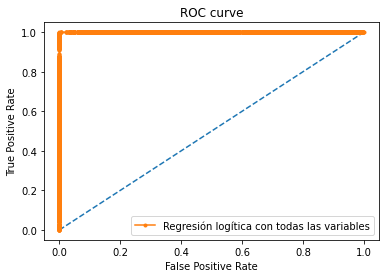

In [199]:
plot_CM(y_test, y_pred)
plot_ROC(reglog, X_test, y_test, scaler, model_name='Regresión logítica con todas las variables')